# Исследовательский анализ рынка общественного питания в Москве для инвесторов фонда 

Дата: 29.09.2025
    
Студент: Сакович Мария 

Цель проекта: 
Провести исследование рынка общественного питания Москвы для определения оптимальных параметров открытия нового заведения с целью максимизации его потенциальной успешности и прибыльности.

-----------

**Оглавление**:
1. Знакомство с данными
2. Предварительная обработка данных

    2.1 Изменение типов данных

    2.2. Обработка пропущенных значений

    2.3 Иправление ошибочных значений

    2.4. Проверка на дубликаты

    2.5. Добавление нового столбца is_24_7
    

3. Исследовательский анализ данных
    
    3.1 Анализ категорий заведений общественного питания Москвы

    3.2. Анализ количества заведений по округам Москвы и отдельно их типов - в ЦАО

    3.3. Изучение сетевых и несетевых заведений	

    3.4. Исследование количества посадочных мест по категориям заведений

    3.5. Исследование рейтинга заведений по различным категориям
    
    3.6. Изучение корреляции между рейтингом заведений и другими характеристиками
    
    3.7. Топ-15 популярных сетей в Москве
    
    3.8. Зависимость среднего чека заведения от округа Москвы

4.Результаты, выводы и рекомендации



-----------

Данные представлены двумя файлами: rest_info.csv (с информацией о заведениях общественного питания) и rest_price.csv (с информацией о ценах в них). 

## Знакомство с данными

In [58]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [59]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix 

Для исследовательского анализа данных предоставлены две таблицы: `rest_info.csv` и `rest_price.csv`.

Загрузим данные из файла `rest_info.csv` и выведем первые 5 строк и информацию о датасете:

In [ ]:
rest_info=pd.read_csv('')
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [61]:
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Таблица `rest_info` состоит из 8406 строк и 9 столбцов и содержит информацию о заведениях общественного питания Москвы. Данные соответствуют описанию, названия столбцов корректны. Присутствуют пропуски в столбцах `hours` и `seats`. 

Типы данных, в основном, корректны - можно понизить размерность в столбце `chain`, поскольку, согласно описанию данных, в нем содержатся только значения 0 и 1. В столбце `seats` данные имеют вещественный, а не целочисленный тип, поскольку содержат пропуски (вероятно, информация о количестве мест в части заведений отсутствует). Следует убедиться, что в нем отсутствуют дробные значения, но, в целом, тип `float64` не помешает дальнейшему анализу, а замена пропусков фиксированными значениями может исказить результаты. 

Остальные типы данных верны. 

Теперь обратимся ко второй таблице - `rest_price.csv`: выведем первые 5 строк и информацию о датасете. 

In [ ]:
rest_price=pd.read_csv('')
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [63]:
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Таблица `rest_price` состоит из 4058 строк и 5 столбцов и содержит информацию о ценах в заведениях общественного питания Москвы. Данные соответствуют описанию, названия столбцов корректны. 

Присутствуют пропуски во всех столбцах, кроме `id`. Вероятно, это связано с отсутствием/неполнотой информации о части заведений. В столбцах `middle_avg_bill` и `middle_coffee_cup` содержится больше всего пропусков - это связано с тем, что они заполняются только если значение в столбце `avg_bill` начинается с подстроки «Средний счёт» и «Цена одной чашки капучино», соответственно, то есть являются взаимоисключающими.

Типы данных, в основном, корректны - можно изменить тип данных в столбце `price` с `object ` на `category`, поскольку согласно описанию данных, в нем содержатся ценовые категории заведений. Аналогично для столбца `category`, содержащего тип заведения.

Следует обратить внимание на то, что количество строк в двух исходных датасетах существенно отличается (8406 и 4058). Будет необходимо проверить данные на наличие явных и неявных дубликатов. 

Объединим два датасетов в один - `df`, по столбцу `id`.

In [64]:
df=pd.merge(rest_info,rest_price,how='left',on='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


In [65]:
# Сохраним в переменную длину исходного датасета
df_len=len(df)

### **Промежуточные выводы:**
- Данные представлены двумя таблицами  и содержат данные о заведениях общественного питания Москвы. 
- После объединения полученный датасет содержит 8406 строк и 13 столбцов. 
- Типы данных, в целом, корректны, для оптимизации можно понизить разрядность целочисленного типа в столбце `chain`, а также заменить тип данных столбцов `price` и `category` на тип `category`.
- Необходимо убедиться, что в столбце `seats` отсутствуют числа с ненулевой дробной частью.
- Содержится большое количество пропусков - в стобцах `hours`, `seats`, `price`,`avg_bill`, `middle_avg_bill`,`middle_coffee_cup`.


---------

## Предварительная обработка данных

Подготовим данные к исследовательскому анализу.

### Изменение типов данных

Понизим разрядность типа данных в столбце `chain`.

In [66]:
df['chain']=pd.to_numeric(df['chain'],downcast='integer')

Изменим тип данных в столбцах `price` и `category` на категориальный. 

In [67]:
df['price']=df['price'].astype('category')
df['category']=df['category'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   object  
 5   hours              7870 non-null   object  
 6   rating             8406 non-null   float64 
 7   chain              8406 non-null   int8    
 8   seats              4795 non-null   float64 
 9   price              3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
dtypes: category(2), float64(4), int8(1), object(6)
memory usage: 682.0+ KB


Понизим разрядность типа данных в столбцах `rating`,`middle_avg_bill`,`middle_coffee_cup`,`seats`

In [68]:
for column in ['rating','middle_avg_bill','middle_coffee_cup','seats']:
    df[column] = pd.to_numeric(df[column], downcast='float')

Проверим, все ли значения в столбце `seats` - без дробной части:

In [69]:
try:
    pd.to_numeric(rest_info['seats'], errors='raise', downcast='integer')
    print(True)
except (ValueError, TypeError):
    print(False)

True


Среди данных в столбце `seats` отсутствуют значения с дробной частью.

### Обработка пропущенных значений

#### Поиск пропусков и предположения об их возникновении

 Рассмотрим данные на предмет пропусков и попробуем найти их причину появления. 

Рассчитаем количество пропусков в столбцах датафрейма:

In [70]:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

Рассчитаем процент пропусков в столбцах датафрейма:

In [71]:
df.isna().sum() / len(df) * 100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 6.376398
rating                0.000000
chain                 0.000000
seats                42.957411
price                60.563883
avg_bill             54.603854
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

Начнем с часов работы заведений. Проверим, в каких типах заведений, в каких округах, с каким рейтингом, сетевых/несетевых встречаются пропуски:

В абсолютных значениях:

In [73]:
for column in 'category','district','rating','chain':
    print(df[df['hours'].isna()==True][column].value_counts())

category
кафе               375
ресторан            74
быстрое питание     33
бар,паб             18
кофейня             15
столовая             9
булочная             7
пиццерия             5
Name: count, dtype: int64
district
Юго-Восточный административный округ       85
Восточный административный округ           75
Западный административный округ            66
Южный административный округ               65
Северо-Восточный административный округ    61
Юго-Западный административный округ        59
Северный административный округ            54
Северо-Западный административный округ     40
Центральный административный округ         31
Name: count, dtype: int64
rating
4.4    65
4.3    58
4.2    49
4.0    47
4.1    45
3.9    32
4.5    32
3.8    26
3.7    24
4.9    16
4.7    16
4.8    15
4.6    12
3.3    11
3.5    10
3.4     8
5.0     8
2.9     8
3.6     7
3.2     6
3.1     6
2.8     4
2.6     4
2.3     4
2.7     3
3.0     3
2.2     3
2.1     3
1.1     2
2.4     2
2.5     2
1.0     1
1.5  

И в долях от общего числа заведений такого типа, округа и т.д. 

In [74]:
for column in 'category','district','rating','chain':
    print(df[df['hours'].isna()==True][column].value_counts()/rest_info[column].value_counts()*100)

category
бар,паб             2.352941
булочная            2.734375
быстрое питание     5.472637
кафе               15.769554
кофейня             1.061571
пиццерия            0.789889
ресторан            3.622124
столовая            2.857143
Name: count, dtype: float64
district
Восточный административный округ            9.398496
Западный административный округ             7.755582
Северный административный округ             6.000000
Северо-Восточный административный округ     6.846240
Северо-Западный административный округ      9.779951
Центральный административный округ          1.382694
Юго-Восточный административный округ       11.904762
Юго-Западный административный округ         8.321580
Южный административный округ                7.286996
Name: count, dtype: float64
rating
1.0    10.000000
1.1          NaN
1.1          NaN
1.2          NaN
1.2          NaN
         ...    
4.8          NaN
4.8          NaN
4.9          NaN
4.9          NaN
5.0     7.619048
Name: count, Length: 69

Из полученных данных видно, что пропуски присутствуют для всех типов заведений, во всех округах, с разным рейтингом, а также для сетевых и несетевых заведений. Это позволяет предположить, что пропуски случайны и зависят от того, как собирались данные. Возможно, в момент сбора данных для части заведений отсутствовала информация о часах работы. 

Проведем аналогичный анализ для столбца с количеством посадочных мест.

In [75]:
for column in 'category','district','rating','chain':
    print(df[df['seats'].isna()==True][column].value_counts())

category
кафе               1160
ресторан            773
кофейня             662
бар,паб             297
быстрое питание     254
пиццерия            206
столовая            151
булочная            108
Name: count, dtype: int64
district
Центральный административный округ         1064
Северо-Восточный административный округ     386
Восточный административный округ            380
Западный административный округ             373
Юго-Восточный административный округ        364
Южный административный округ                325
Северный административный округ             315
Юго-Западный административный округ         261
Северо-Западный административный округ      143
Name: count, dtype: int64
rating
4.3    605
4.4    527
4.2    421
4.1    347
4.5    275
4.0    217
4.7    190
4.6    179
4.9    122
3.9    120
4.8     99
3.8     85
3.7     71
5.0     55
3.6     39
3.4     37
3.5     35
3.3     28
3.2     21
2.9     19
2.8     18
3.1     18
2.6     11
2.2      9
2.7      7
2.3      7
3.0      6
2.

Здесь аналогично можно сделать вывод о том, что пропуски случайны. Вероятно, на момент сбора информации отсутствовали данные о количестве посадочных мест в части заведений.

Посмотрим на пропуски в столбцах о ценах и ценовой категории: price, avg_bill, middle_avg_bill, middle_coffee_cup 

Проверим взаимосвязь пропусков в столбцах avg_bill, middle_avg_bill и middle_coffee_cup. По условию ячейки в столбце middle_avg_bill заполняются средним арифметическим из диапазона цен в avg_bill, если соответствующая ячейка в нем начинается с подстроки "Средний счёт", а middle_coffee_cup - аналогично, если с "Цена чашки капучино".

Другими словами, стоит проверить, есть ли в столбце avg_bill ячейки, начинающиеся с "Средний счёт" или "Цена чашки капучино", для которых пропущено значение в middle_avg_bill или middle_coffee_cup, соответственно. И наоборот - есть ли строки, в которых заполнено или middle_avg_bill, или middle_coffee_cup, но пропуск в avg_bill

In [76]:
((df['avg_bill'].str.startswith('Средний счёт', na=False))&(df['middle_avg_bill'].isna())).sum()

0

In [77]:
((df['avg_bill'].str.startswith('Цена чашки капучино', na=False))&(df['middle_coffee_cup'].isna())).sum()

0

Отсутствуют строки, где указан Средний счет или Цена чашки капучино в avg_bill, но не заполнены middle_avg_bill или middle_coffee_cup.  Следовательно, заполнить пропуски не удастся. 

In [78]:
((df['middle_avg_bill'].isna()==False)&(df['avg_bill'].isna())).sum()

0

In [79]:
((df['middle_coffee_cup'].isna()==False)&(df['avg_bill'].isna())).sum()

0

Отсутствуют строки, где в avg_bill содержится пропуск, но заполнены middle_avg_bill или middle_coffee_cup. Следовательно, заполнить пропуски не удастся. 

Взаимосвязь пропусков в столбцах price и avg_bill удобно изучить на исходном датасете rest_price, чтобы избежать обработки пропусков, которые образуются на этапе объединения датасетов.

In [80]:
((rest_price['price'].isna())&(rest_price['avg_bill'].isna())).sum()

0

Получается, для всех заведений, представленных в rest_price, указана или ценовая категория, или средний чек, или и то, и другое.

In [81]:
((df['price'].isna())&(df['avg_bill'].isna()==False)).sum()

743

In [82]:
((df['avg_bill'].isna())&(df['price'].isna()==False)).sum()

242

В 743 строках указан только avg_bill, а в 242 - только price.

In [83]:
df[(df['avg_bill'].isna()) & (df['price'].notna())].groupby('price')['avg_bill'].size()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22892\3400098889.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[(df['avg_bill'].isna()) & (df['price'].notna())].groupby('price')['avg_bill'].size()


price
высокие           23
выше среднего     40
низкие             6
средние          173
Name: avg_bill, dtype: int64

In [84]:
df[(df['price'].isna()) & (df['avg_bill'].notna())].groupby('avg_bill')['price'].size()

avg_bill
Средний счёт:1000 ₽              3
Средний счёт:1000–1200 ₽         4
Средний счёт:1000–1500 ₽        30
Средний счёт:1000–2000 ₽         3
Средний счёт:100–160 ₽           1
                                ..
Цена чашки капучино:от 230 ₽     1
Цена чашки капучино:от 270 ₽     1
Цена чашки капучино:от 60 ₽     28
Цена чашки капучино:от 89 ₽      2
Цена чашки капучино:от 90 ₽      2
Name: price, Length: 368, dtype: int64

Пропуски в столбце avg_bill присутствуют во всех ценовых категориях из price. И, наоборот, - пропуски в price присутствуют для 368 различных значений avg_bill. Это позволяет предположить, что пропуски случайны. 

Проверим, удастся ли заполнить пропуски в avg_bill и price. Выведем </span> уникальные значения столбца `price`

In [85]:
df['price'].unique()

[NaN, 'выше среднего', 'средние', 'высокие', 'низкие']
Categories (4, object): ['высокие', 'выше среднего', 'низкие', 'средние']

Выведем диапазоны цен для каждой категории

In [86]:
for price in df['price'].unique():
    print(f"{price}:{df[df['price']==price]['middle_avg_bill'].min()}-{df[df['price']==price]['middle_avg_bill'].max()}")

nan:nan-nan
выше среднего:375.0-4500.0
средние:165.0-2150.0
высокие:0.0-35000.0
низкие:90.0-600.0


Из полученных диапазонов видно, что нет четкого критерия принадлежности к той или иной категории (диапазоны имеют пересечения, некоторые значения относятся к нескольким категориям), поэтому пропуски в столбце `price` заполнить не удастся.

Проверим аналогичным образом столбец с ценой чашки капучино. 

In [87]:
for price in df['price'].unique():
    print(f"{price}:{df[df['price']==price]['middle_coffee_cup'].min()}-{df[df['price']==price]['middle_coffee_cup'].max()}")

nan:nan-nan
выше среднего:150.0-256.0
средние:60.0-1568.0
высокие:250.0-250.0
низкие:60.0-256.0


Как и со средним чеком, здесь нет четкого правила принадлежности к той или иной ценовой категории - пропуски заполнить не удастся.

#### Обработка пропусков

В подразделе 2.2.1 были сделаны выводы о том, что пропуски в столбцах hours, seats, price, avg_bill - случайны, а middle_avg_bill, middle_coffee_cup - неслучайны и зависят от содержимого столбца avg_bill. 

Пропущенные ячейки в hours, price, avg_bill можно заполнить "нет данных", в числовых столбцах пропуски следует оставить. 

In [88]:
df['hours']=df['hours'].fillna('нет данных')

In [89]:
df['price'] = df['price'].cat.add_categories(['нет данных']) #Поскольку тип данных - category, то необходимо добавить новую категорию перед заполнением пропусков
df['price']=df['price'].fillna('нет данных')
df['avg_bill']=df['avg_bill'].fillna('нет данных')

Выведем информацию по полученному датасету.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   object  
 5   hours              8406 non-null   object  
 6   rating             8406 non-null   float32 
 7   chain              8406 non-null   int8    
 8   seats              4795 non-null   float32 
 9   price              8406 non-null   category
 10  avg_bill           8406 non-null   object  
 11  middle_avg_bill    3149 non-null   float32 
 12  middle_coffee_cup  535 non-null    float32 
dtypes: category(2), float32(4), int8(1), object(6)
memory usage: 550.7+ KB


In [91]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,нет данных,нет данных,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,нет данных,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


### Иправление ошибочных значений

При анализе пропусков мы обнаружили, что в столбце со средним чеком в категории "высокие" присутствует значение 0.0, которое, очевидно, является ошибкой. Скорее всего, данные о ценах каких-то заведений отсутствуют. Проверим, сколько таких строк. 

In [92]:
print(df[df['middle_avg_bill']==0].shape[0])
df[df['middle_avg_bill']==0]

1


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
3688,502d91289bc5470eabd77fd77cc79821,Кофемания,кофейня,"Москва, улица Новый Арбат, 19",Центральный административный округ,"ежедневно, круглосуточно",4.5,1,200.0,высокие,Средний счёт:от 0 ₽,0.0,NaN


В датасете присутствует одна строка со значением 0.0 в столбце `middle_avg_bill`, Средний счет при этом также равен 0. Вероятно, данные о среднем чеке отсутствуют, поэтому заменим эти ячейки пропусками. 

In [93]:
df['middle_avg_bill']=df['middle_avg_bill'].replace(0,np.nan)
df['avg_bill']=df['avg_bill'].replace('Средний счёт:от 0 ₽',np.nan)

После замены нулевого значения пропуском снова выведем диапазон для заведений с "высокими" ценами:

In [94]:
print(f"{'высокие'}:{df[df['price']=='высокие']['middle_avg_bill'].min()}-{df[df['price']=='высокие']['middle_avg_bill'].max()}")

высокие:950.0-35000.0


Отлично, больше аномально-низких цен в столбце со средним чеком нет (950 рублей можно считать "высокой" ценой, если речь о какой-то невероятно навороченной шаурме, а 35000 тоже может быть реальным значением среднего чека в каком-нибудь эксклюзивном заведении).

Также в столбце со средней ценой чашки капучино присутствовало подозрительно высокое значение в "средних" ценах - 1568 руб. Посмотрим на все значения цен выше 256 (полученный максимум в категориях "низкие",  и "выше среднего").

In [95]:
#Выведем количество заведений, для которых средняя цена чашки капучино выше 256.
df[df['middle_coffee_cup']>256].shape[0]

46

In [96]:
#Отсортируем по цене и выведем первые 10
df[df['middle_coffee_cup']>256].sort_values(by='middle_coffee_cup',ascending=False).head(10)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
2859,131f2d0c191e4f868d88a8da8ffece1f,Шоколадница,кофейня,"Москва, Большая Семёновская улица, 27, корп. 1",Восточный административный округ,"ежедневно, 08:00–23:00",4.2,1,48.0,средние,Цена чашки капучино:230–2907 ₽,NaN,1568.0
5503,e6e956fcb6324aafa8caa0c441dbde01,Coffee FM,кофейня,"Москва, Авиамоторная улица, 10, корп. 1",Юго-Восточный административный округ,"пн-пт 08:00–21:00; сб,вс 09:00–19:00",4.3,0,190.0,нет данных,Цена чашки капучино:250–500 ₽,NaN,375.0
3718,1a8a69d431ce46579fc6369a15ee9d65,Кафетериус,кофейня,"Москва, Большая Никитская улица, 35",Центральный административный округ,"пн-пт 08:00–22:00; сб,вс 10:00–22:00",4.3,1,30.0,средние,Цена чашки капучино:279–378 ₽,NaN,328.0
1769,dbfcb2e81ff94f5dae61f0eeae6ad126,Шоколадница,кофейня,"Москва, Бутырская улица, 95",Северный административный округ,пн-чт 07:30–23:00; пт 07:30–00:00; сб круглосу...,4.1,1,61.0,средние,Цена чашки капучино:300–350 ₽,NaN,325.0
5990,a2160e8ec81b4197b6bf19187a73c407,Диемм,кофейня,"Москва, 3-я Фрунзенская улица, 1",Центральный административный округ,"ежедневно, 08:30–23:00",4.3,0,30.0,средние,Цена чашки капучино:250–390 ₽,NaN,320.0
2075,b90dfdecc900475c959e66c6f87cabae,Il Tocco,кофейня,"Москва, Ходынский бульвар, 11А",Северный административный округ,"пн-пт 08:00–21:00; сб,вс 09:00–22:00",4.1,0,NaN,средние,Цена чашки капучино:280–350 ₽,NaN,315.0
6687,bbdc360d32b84ad689714b7c4df614db,Па Па Кофе,кофейня,"Москва, проспект Вернадского, 86В",Западный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–01:00; вс 10:00...",4.2,0,NaN,средние,Цена чашки капучино:от 300 ₽,NaN,300.0
4657,3faf315585b944ceb87c9a5fe80c1aeb,Espressium,кофейня,"Москва, Большая Сухаревская площадь, 14/7",Центральный административный округ,"пн-пт 08:00–21:00; сб,вс 09:00–21:00",4.4,0,30.0,средние,Цена чашки капучино:от 300 ₽,NaN,300.0
4578,4165454762e347f5b7fd1bef10b9ba35,Ycp,кофейня,"Москва, Мясницкая улица, 13, стр. 21",Центральный административный округ,"пн-пт 09:00–22:00; сб,вс 10:00–22:00",4.8,0,NaN,нет данных,Цена чашки капучино:300 ₽,NaN,300.0
3095,381c4eafab694cbe9d2d5fac345b4b3d,ДаблБи,кофейня,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 08:00–22:00",4.0,1,276.0,средние,Цена чашки капучино:250–350 ₽,NaN,300.0


В полученном срезе есть одно значение, существенно превышающее остальные - это строка 2859. Цена чашки капучино в нем :230–2907 ₽. Заведение относится к сети "Шоколадница". Посмотрим на цены за чашку кофе в заведениях этой сети. 

In [97]:
df[(df['name']=='Шоколадница')&(df['avg_bill'].notna())&(df['middle_coffee_cup'].notna())][['avg_bill','middle_coffee_cup']].sort_values(by='middle_coffee_cup',ascending=False)

,avg_bill,middle_coffee_cup
2859,Цена чашки капучино:230–2907 ₽,1568.0
1769,Цена чашки капучино:300–350 ₽,325.0
6979,Цена чашки капучино:284–299 ₽,291.0
3197,Цена чашки капучино:284–299 ₽,291.0
5076,Цена чашки капучино:284–299 ₽,291.0
...,...,...
6796,Цена чашки капучино:179–275 ₽,227.0
3048,Цена чашки капучино:150–290 ₽,220.0
1190,Цена чашки капучино:150–290 ₽,220.0
529,Цена чашки капучино:179–249 ₽,214.0


In [98]:
df[(df['name']=='Шоколадница') & (df['avg_bill'].str.contains('капучино'))]['avg_bill'].sort_values().unique()

array(['Цена чашки капучино:150–290 ₽', 'Цена чашки капучино:179–249 ₽',
       'Цена чашки капучино:179–275 ₽', 'Цена чашки капучино:179–314 ₽',
       'Цена чашки капучино:230–290 ₽', 'Цена чашки капучино:230–2907 ₽',
       'Цена чашки капучино:239–274 ₽', 'Цена чашки капучино:249–284 ₽',
       'Цена чашки капучино:250 ₽', 'Цена чашки капучино:284–299 ₽',
       'Цена чашки капучино:285–289 ₽', 'Цена чашки капучино:300–350 ₽',
       'Цена чашки капучино:от 170 ₽'], dtype=object)

Значение 'Цена чашки капучино:230–2907 ₽' может быть результатом опечатки, поскольку в столбце присутствует значение 'Цена чашки капучино:230–290 ₽'. Исправим ошибочную среднюю цену и диапазон.

In [99]:
df['middle_coffee_cup']=df['middle_coffee_cup'].replace(1568.0,(230+290)/2)
df['avg_bill']=df['avg_bill'].replace('Цена чашки капучино:230–2907 ₽','Цена чашки капучино:230–290 ₽')

Мы исправили ошибочное значение, но нужно помнить о том, что ценовые категории в столбце `price` не подчиняются строгим критериям, а поэтому для анализа цен следует опираться на столбцы `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`.

Проверим на ошибочные значения в других числовых столбцах - `rating` и `seats`.

In [100]:
f"rating: {df['rating'].min()}-{df['rating'].max()}"

'rating: 1.0-5.0'

В столбце с рейтингом заведений значения принимают от 1 до 5 - в соответствии с описанием данных.

### Проверка на дубликаты

Проверим уникальные значения в столбцах `category`,`district`,`price`:

In [101]:
for column in 'category','district','price':
    print(df[column].unique())

['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']
Categories (8, object): ['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня', 'пиццерия', 'ресторан', 'столовая']
['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']
['нет данных', 'выше среднего', 'средние', 'высокие', 'низкие']
Categories (5, object): ['высокие', 'выше среднего', 'низкие', 'средние', 'нет данных']


Неявных дубликатов в рассмотренных столбцах нет.

Проверим наличие явных дубликатов в датасете.

In [102]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют.

Переведем название ресторанов и адресов в верхний регистр и удалим возможные лишние пробелы.

In [103]:
df['name']=df['name'].str.upper()

In [104]:
df['name']=df['name'].str.strip()

In [105]:
df['address']=df['address'].str.upper()

In [106]:
df['address']=df['address'].str.strip()

Проверим, есть ли дубликаты по сочетанию названия и адреса.

In [107]:
df.duplicated(subset=['name', 'address']).sum()


4

In [108]:
df[df.duplicated(subset=['name', 'address'],keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,КАФЕ,кафе,"МОСКВА, ПАРК АНГАРСКИЕ ПРУДЫ",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,нет данных,нет данных,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,КАФЕ,кафе,"МОСКВА, ПАРК АНГАРСКИЕ ПРУДЫ",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,нет данных,нет данных,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,MORE POKE,ресторан,"МОСКВА, ВОЛОКОЛАМСКОЕ ШОССЕ, 11, СТР. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,нет данных,нет данных,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,MORE POKE,ресторан,"МОСКВА, ВОЛОКОЛАМСКОЕ ШОССЕ, 11, СТР. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,нет данных,нет данных,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ,ресторан,"МОСКВА, ПРОСПЕКТ МИРА, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,нет данных,нет данных,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ,"бар,паб","МОСКВА, ПРОСПЕКТ МИРА, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,нет данных,нет данных,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,ХЛЕБ ДА ВЫПЕЧКА,булочная,"МОСКВА, ЯРЦЕВСКАЯ УЛИЦА, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,нет данных,нет данных,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,ХЛЕБ ДА ВЫПЕЧКА,кафе,"МОСКВА, ЯРЦЕВСКАЯ УЛИЦА, 19",Западный административный округ,нет данных,4.1,0,276.0,нет данных,нет данных,NaN,NaN


Обнаружено 4 дубликата по столбцам с именем и адресом заведения, у них отличаются режим работы и/или категория заведения - удалим их. 

In [109]:
df.drop_duplicates(subset=['name', 'address'], keep='first', inplace=True) 

### Добавление нового столбца is_24_7

Для последующего анализа добавим столбец `is_24_7`, отражающий, является ли заведение работающим ежедневно и круглосуточно.

In [110]:
df['is_24_7']=df['hours'].str.contains('ежедневно, круглосуточно')

In [111]:
# Комментарий ревьюера
df['is_24_7'].value_counts()

is_24_7
False    7672
True      730
Name: count, dtype: int64

In [112]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = df_len, len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8402 
 Удалено строк в датасете после обработки 4 
 Процент потерь 0.05


### **Промежуточные выводы:**
- Исправлены типы данных
- Обработаны пропуски - где возможно, заменены на "нет данных", в остальных случаях оставлены
- Исправлены ошибочные значения в столбце среднего чека (1 значение) и средней цены капучино (1 значение)
- Обнаружена ошибка в данных о количестве посадочных мест, значения заменены пропусками
- Удалены 4 дубликата по столбцам с именем и адресом заведения
- Добавлен столбец `is_24_7`

-----

## Исследовательский анализ данных

### Анализ категорий заведений общественного питания Москвы


Рассчитаем количества заведений каждого типа

In [113]:
df['category'].value_counts()
#Значения отличаются от образца, т.к. очищены от дубликатов. 

category
кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

Построим столбчатую диаграмму, отражающую количество заведений общественного питания разных типов.

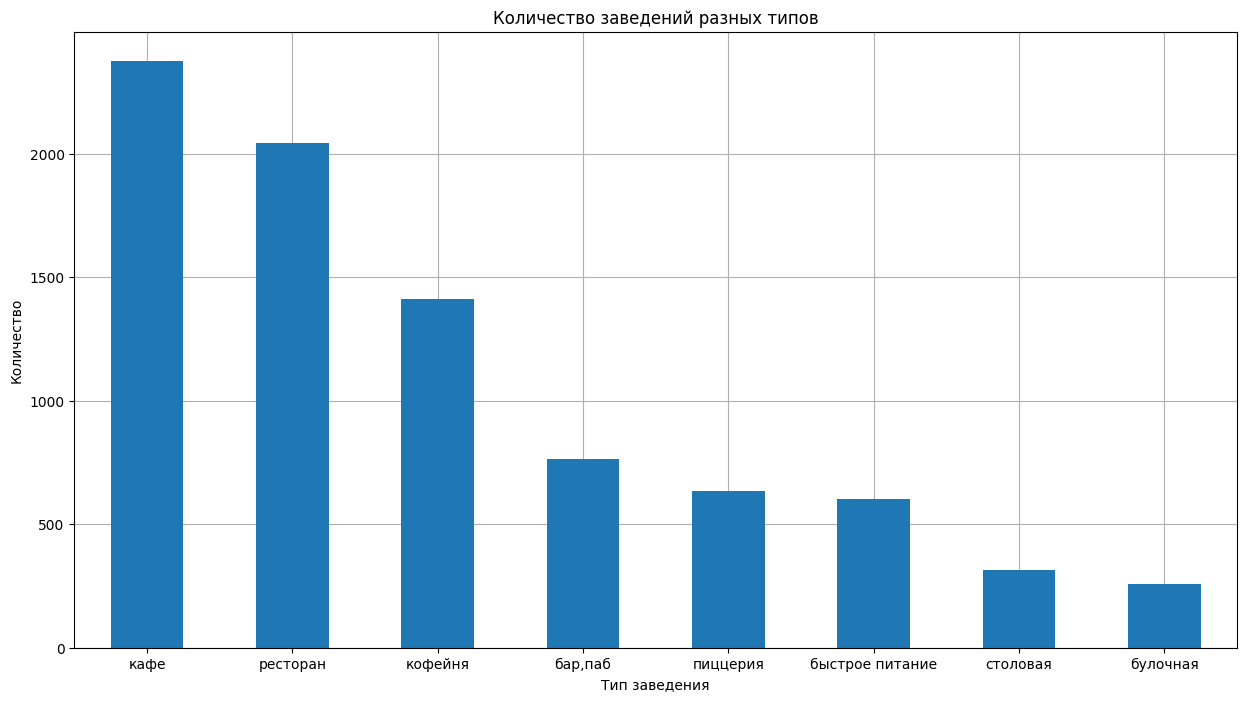

In [114]:
df['category'].value_counts().plot(
    kind='bar',rot='0',
    figsize=(15, 8),  
    title='Количество заведений разных типов', 
    xlabel='Тип заведения',
    ylabel='Количество',
    grid=True
)
plt.gca().set_axisbelow(True)

plt.show()


Также рассчитаем количество заведений в процентном отношении:

In [115]:
round(df['category'].value_counts(normalize=True)*100,1)

category
кафе               28.3
ресторан           24.3
кофейня            16.8
бар,паб             9.1
пиццерия            7.5
быстрое питание     7.2
столовая            3.7
булочная            3.0
Name: proportion, dtype: float64

В данных представлены заведения 8 различных категорий, при этом на кафе (их - максимальное количество), рестораны и кофейни приходится около 70% всех заведений. 

### Анализ количества заведений по округам Москвы и отдельно их типов - в ЦАО

Для более удобного чтения графиков заменим названия округов Москвы - аббревиатурами.

In [116]:
df['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

In [117]:
df['district']=df['district'].replace({
        'Северный административный округ':'САО',
        'Северо-Восточный административный округ':'СВАО',
        'Северо-Западный административный округ':'СЗАО',
        'Западный административный округ':'ЗАО',
        'Центральный административный округ':'ЦАО',
        'Восточный административный округ':'ВАО',
        'Юго-Восточный административный округ':'ЮВАО',
        'Южный административный округ':'ЮАО',
        'Юго-Западный административный округ':'ЮЗАО'
})

Построим столбчатую диаграмму распределения заведений по округам Москвы.

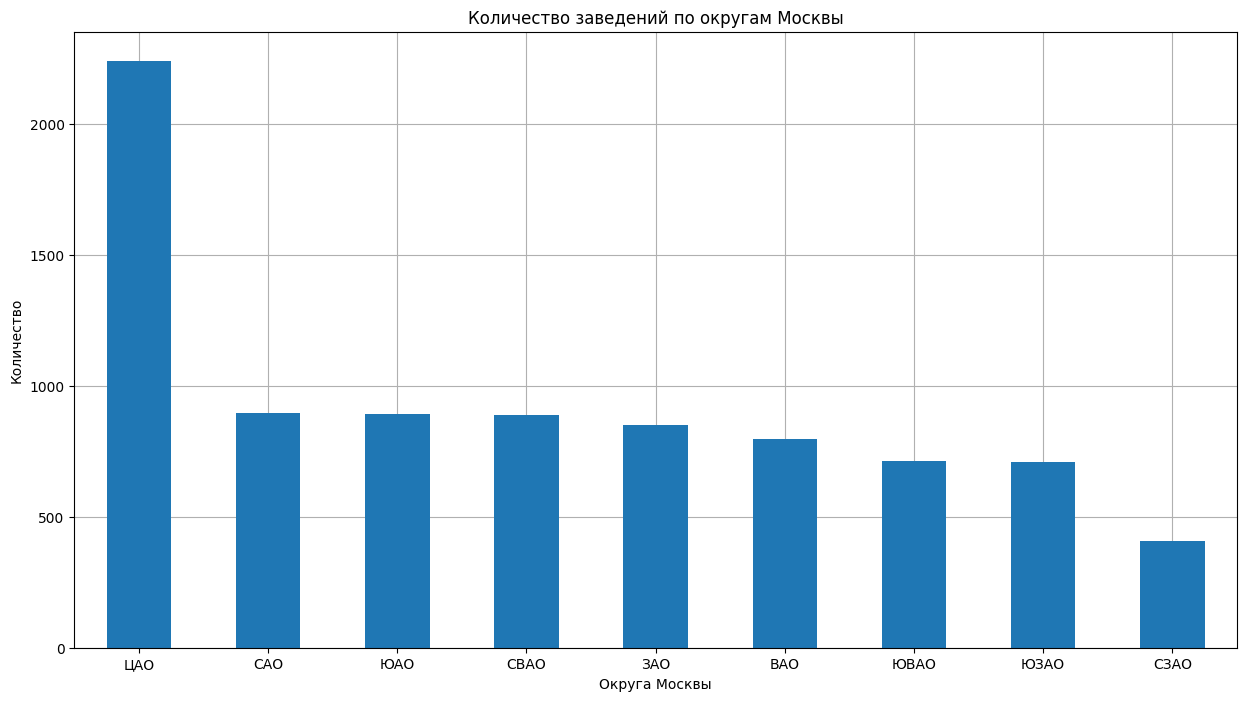

In [118]:
df['district'].value_counts().plot(
    kind='bar',
    rot='0',
    figsize=(15, 8),  
    title='Количество заведений по округам Москвы',
    xlabel='Округа Москвы',
    ylabel='Количество',
    grid=True)
plt.gca().set_axisbelow(True)


plt.show()

Рассчитаем количество заведений по округам. 

In [119]:
df['district'].value_counts()

district
ЦАО     2242
САО      898
ЮАО      892
СВАО     890
ЗАО      850
ВАО      798
ЮВАО     714
ЮЗАО     709
СЗАО     409
Name: count, dtype: int64

Также рассчитаем доли по округам в процентах.

In [120]:
round(df['district'].value_counts(normalize=True),3)

district
ЦАО     0.267
САО     0.107
ЮАО     0.106
СВАО    0.106
ЗАО     0.101
ВАО     0.095
ЮВАО    0.085
ЮЗАО    0.084
СЗАО    0.049
Name: proportion, dtype: float64

График демонстрирует, что в Центральном Автономном округе количество заведений общественного питания максимальное и составляет 26,7% от общего числа. Самое маленькое количество заведений - в СЗАО - менее 5%, в остальных округах количества близкие и составляют от 8,4% до 10,7% от общего числа. 

Далее рассмотрим распределение заведений по типам в Центральном Автономном округе.

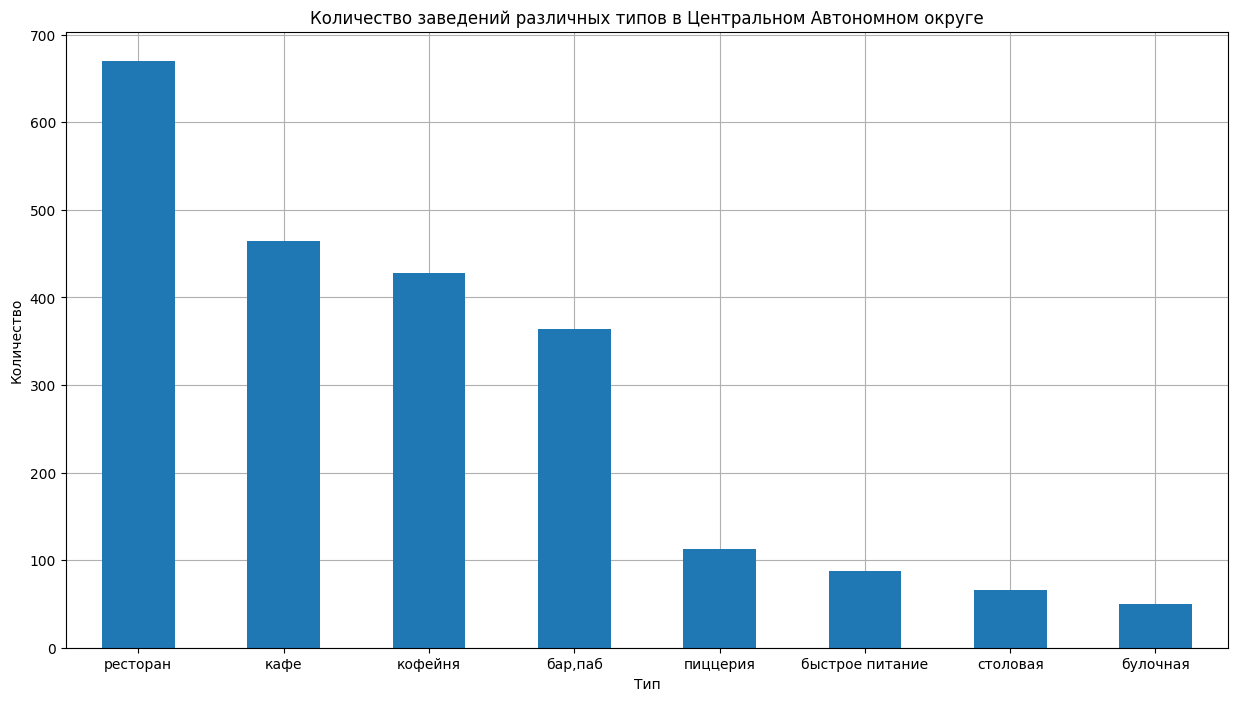

In [121]:
df[df['district']=='ЦАО']['category'].value_counts().plot(
    kind='bar',
    rot='0',
    figsize=(15, 8),  
    title='Количество заведений различных типов в Центральном Автономном округе',
    xlabel='Тип',
    ylabel='Количество',
    grid=True)
plt.gca().set_axisbelow(True)

plt.show()

Рассчитаем количество заведений разных типов в ЦАО в абсолютных и относительных значениях. 

In [122]:
df[df['district']=='ЦАО']['category'].value_counts()

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: count, dtype: int64

In [123]:
round(df[df['district']=='ЦАО']['category'].value_counts(normalize=True)*100,1)

category
ресторан           29.9
кафе               20.7
кофейня            19.1
бар,паб            16.2
пиццерия            5.0
быстрое питание     3.9
столовая            2.9
булочная            2.2
Name: proportion, dtype: float64

Построим дополнительный график для сравнения соотношения заведений разных типов в среднем по Москве и в ЦАО.

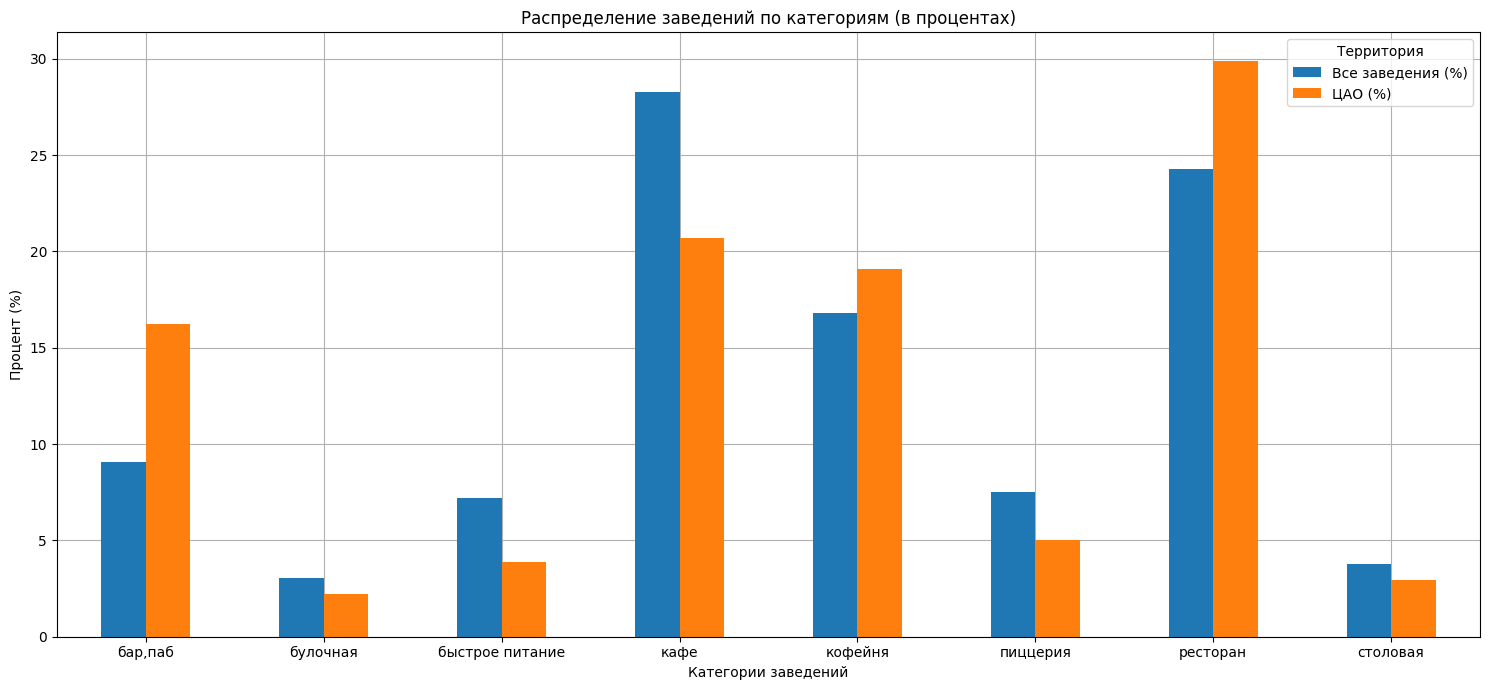

In [124]:
total=df['category'].value_counts(normalize=True)*100
cao=df[df['district']=='ЦАО']['category'].value_counts(normalize=True) * 100
#Создадим датафрейм с процентными соотношениями заведений разных типов в среднем по Москве и в ЦАО
comparisson = pd.DataFrame({
    'Все заведения (%)': total,
    'ЦАО (%)': cao
})

comparisson.plot(
    kind='bar',
    figsize=(15, 7),
    rot=0,
    title='Распределение заведений по категориям (в процентах)',
    grid=True
)
plt.gca().set_axisbelow(True)
plt.xlabel('Категории заведений')
plt.ylabel('Процент (%)')
plt.legend(title='Территория')
plt.tight_layout()
plt.show()

В ЦАО распределение заведений по типам существенно отличается от среднего по Москве. В частности, на первом месте по количеству заведений идут рестораны - их около 30%, а на кафе приходится только ~21% заведений. Также количество баров/пабов существенно выше, чем в среднем по Москве - 16% против 9%. 

### Изучение сетевых и несетевых заведений

Рассчитаем количество сетевых и несетевых заведений. 0 - несетевое, 1 - сетевое

In [125]:
df['chain'].value_counts()

chain
0    5199
1    3203
Name: count, dtype: int64

Сетевых заведений 3203, а несетевых - 5200.

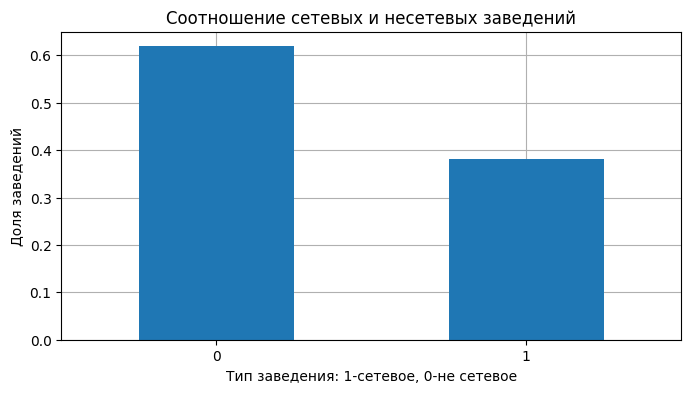

In [126]:
df['chain'].value_counts(normalize=True).plot(
    kind='bar',
    figsize=(8,4),
    rot=0,
    xlabel='Тип заведения: 1-сетевое, 0-не сетевое',
    ylabel='Доля заведений',
    title='Соотношение сетевых и несетевых заведений',
    grid=True
)
plt.gca().set_axisbelow(True)
plt.show()

Теперь рассчитаем количество сетевых и несетевых заведений в разрезе различных категорий.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22892\2504125393.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_chain = df.groupby(['category','chain'])['category'].agg('count').unstack(fill_value=0)


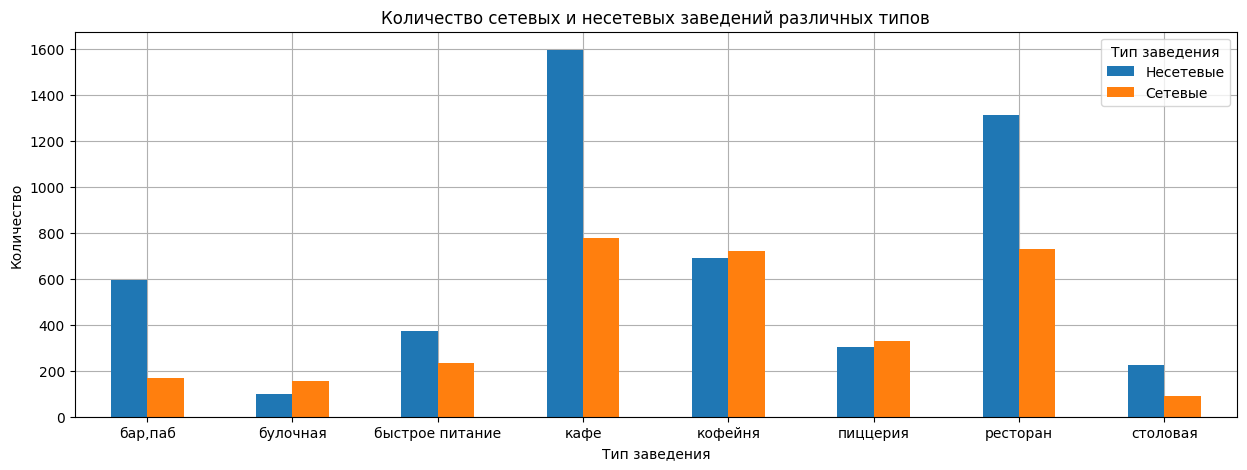

In [127]:
df_chain = df.groupby(['category','chain'])['category'].agg('count').unstack(fill_value=0)
df_chain[[0,1]].plot(kind='bar', 
                legend=True,
                figsize=(15, 5),
                rot=0,
                grid=True,
                title='Количество сетевых и несетевых заведений различных типов',
                xlabel='Тип заведения',
                ylabel='Количество')
plt.gca().set_axisbelow(True)
plt.legend(['Несетевые', 'Сетевые'], title='Тип заведения')

plt.show()


Для изучения соотношения сетевых и несетевых заведений различных типов будет удобнее построить график долей для каждого типа.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22892\876336905.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_chain = df.groupby(['category','chain'])['category'].agg('count').unstack(fill_value=0)


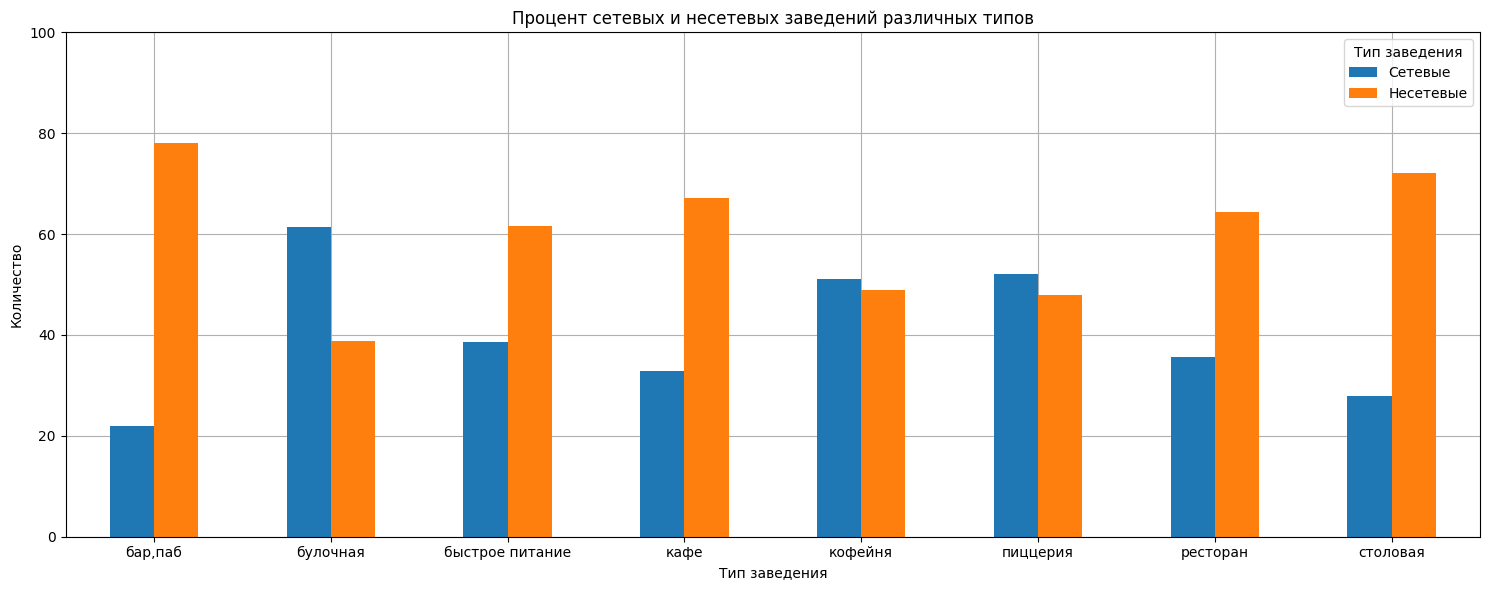

In [128]:
df_chain = df.groupby(['category','chain'])['category'].agg('count').unstack(fill_value=0)
df_chain['chain_share'] = (df_chain[1] / (df_chain[0] + df_chain[1]) * 100).round(1)
df_chain['non_chain_share']=100-df_chain['chain_share']
df_chain[['chain_share','non_chain_share']].plot(kind='bar', 
                      legend=True,
                      figsize=(15, 6),
                      rot=0,
                      xlabel='Тип заведения',
                        ylabel='Количество',
                      grid=True,
                      title='Процент сетевых и несетевых заведений различных типов')
plt.gca().set_axisbelow(True)
plt.ylim(0, 100)
plt.legend( ['Сетевые', 'Несетевые'],    title='Тип заведения')
plt.tight_layout()
plt.show()

In [129]:
df_chain

chain,0,1,chain_share,non_chain_share
category,,,,
"бар,паб",596,168,22.0,78.0
булочная,99,157,61.3,38.7
быстрое питание,371,232,38.5,61.5
кафе,1597,779,32.8,67.2
кофейня,693,720,51.0,49.0
пиццерия,303,330,52.1,47.9
ресторан,1313,729,35.7,64.3
столовая,227,88,27.9,72.1


По графику можем заметить, что доля сетевых заведений максимальная - для булочных, среди кофеен и пиццерий количества сетевых и несетевых заведений примерно одинаковы, с небольшим преобладанием сетевых. А меньше всего доля сетевых - среди баров/пабов и столовых (22% и ~28% соответственно ).

### Исследование количества посадочных мест по категориям заведений

Выведем диапазон значений, которые присутствуют в столбце с количеством посадочных мест. 

In [130]:
f"seats:{df['seats'].min()}-{df['seats'].max()}"

'seats:0.0-1288.0'

В столбце с количеством посадочных мест значения - от 0 до 1288. 

Выведем строки с значением в столбце `seats` выше 300.

In [131]:
df[df['seats']>300].sort_values(by='seats')

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
8315,0fe1bb796f5143359444382245e247e0,ЧАЙХАНА БИШКЕК,ресторан,"МОСКВА, ТИХОРЕЦКИЙ БУЛЬВАР, 2, КОРП. 1",ЮВАО,"ежедневно, 09:00–01:30",4.1,0,305.0,нет данных,нет данных,NaN,NaN,False
5200,4382228720534137847f201a6bd773b8,ПРАВДА КОФЕ,кофейня,"МОСКВА, ПЯТНИЦКАЯ УЛИЦА, 29",ЦАО,"пн-пт 07:30–22:00; сб,вс 09:00–22:00",4.3,1,306.0,низкие,Средний счёт:90–190 ₽,140.0,NaN,False
5176,230d86ddbc554d7aac0faabfba3abfcc,PRIME,ресторан,"МОСКВА, ПЯТНИЦКАЯ УЛИЦА, 29",ЦАО,пн-пт 07:00–22:00; сб 08:00–22:00; вс 08:00–21:00,4.2,1,306.0,средние,Средний счёт:400 ₽,400.0,NaN,False
4968,ddfabbbcf58847fb8a5a6537e8c59c07,МАРУ,быстрое питание,"МОСКВА, ПЯТНИЦКАЯ УЛИЦА, 29",ЦАО,"ежедневно, 11:00–22:45",4.2,0,306.0,нет данных,нет данных,NaN,NaN,False
5116,4d754d90f43f44eb97494580fbf296c0,КОЗЛОВИЦА,"бар,паб","МОСКВА, ПЯТНИЦКАЯ УЛИЦА, 29",ЦАО,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,0,306.0,средние,Средний счёт:800–1200 ₽,1000.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838,0b8062d352c84a65bca70622eecbc745,ALTERNATIVE COFFEE,кофейня,"МОСКВА, ПРОСПЕКТ ВЕРНАДСКОГО, 41, СТР. 1",ЗАО,"пн-пт 09:00–21:00; сб,вс 09:00–22:00",4.3,0,1288.0,нет данных,нет данных,NaN,NaN,False
6574,5925d9677fe24778a27e35ccd88c0a2d,МЮНГЕР,пиццерия,"МОСКВА, ПРОСПЕКТ ВЕРНАДСКОГО, 97, КОРП. 1",ЗАО,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",4.8,1,1288.0,нет данных,нет данных,NaN,NaN,False
6518,fbf22d98b62a47fbb2a71be3545f16b2,DELONIXCAFE,ресторан,"МОСКВА, ПРОСПЕКТ ВЕРНАДСКОГО, 94, КОРП. 1",ЗАО,"ежедневно, круглосуточно",4.1,0,1288.0,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,True
6690,f9e4ec2d1e5946cf83c9564b2d06acd6,ЯПОНСКАЯ КУХНЯ,ресторан,"МОСКВА, ПРОСПЕКТ ВЕРНАДСКОГО, 121, КОРП. 1",ЗАО,нет данных,4.4,1,1288.0,нет данных,нет данных,NaN,NaN,False


В полученной таблице видно, что, например, заведения с 306 "местами" имеют одинаковый адрес. Это может происходить по одной из двух причин:
1) если по адресу находится, например, торговый центр, то в них часто заведения расположены в фудкортах со свободной посадкой, и невозможно определить, сколько мест относится к какому заведению, тогда высокие значения количества мест могут быть суммой всех посадочных мест на фудкорте.
2) может быть ошибка в сборе данных, из-за которой количество посадочных мест указывается суммарным на здание (так, например, по адресу Москва, Пятницкая улица, 29	нет торгового центра - заведения имеют разные входы, поэтому суммировать посадочные места некорректно)

Выведем строки с одинаковой комбинацией адреса и количества мест.

In [132]:
address_vs_seats=df[(df.duplicated(subset=['seats', 'address'],keep=False))&(df['seats'].notna())].sort_values(by=['seats','address'])
address_vs_seats

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
3287,08d2052ae2d942df948dc3699dadbc42,ЗДОРОВОЕ ПИТАНИЕ,столовая,"МОСКВА, 1-Й СИЛИКАТНЫЙ ПРОЕЗД, 13",СЗАО,пн-пт 09:00–18:00; сб 09:00–17:00,4.2,0,0.0,средние,Средний счёт:200–300 ₽,250.0,NaN,False
3372,832f7d1b38984979bd0b6b1ca5af3fdd,КЛИНКОМ,столовая,"МОСКВА, 1-Й СИЛИКАТНЫЙ ПРОЕЗД, 13",СЗАО,пн-пт 09:00–18:00; сб 09:00–17:00,3.5,0,0.0,нет данных,нет данных,NaN,NaN,False
1623,d78740a2acc548d197a061af785fa209,I-CUP,кофейня,"МОСКВА, БУТЫРСКАЯ УЛИЦА, 97",САО,"ежедневно, 07:00–21:00",5.0,1,0.0,низкие,Цена чашки капучино:60–120 ₽,NaN,90.0,False
1676,13b0615cf1c945458d9782d984672247,FRENCH BAKERY,кофейня,"МОСКВА, БУТЫРСКАЯ УЛИЦА, 97",САО,пн-пт 07:30–23:00; сб 08:00–22:00; вс 09:00–21:00,4.4,1,0.0,нет данных,нет данных,NaN,NaN,False
1932,f8192ad3222142a487a205014b16a76e,COFIX,кофейня,"МОСКВА, БУТЫРСКАЯ УЛИЦА, 97",САО,"пн-пт 07:00–22:00; сб,вс 08:00–22:00",4.1,1,0.0,нет данных,нет данных,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,0508ba663a4c42d1b5068e51afcc26ef,ONE PRICE COFFEE,кофейня,"МОСКВА, ПРОСПЕКТ ВЕРНАДСКОГО, 84, СТР. 1",ЗАО,"ежедневно, 08:30–20:00",4.3,1,1288.0,нет данных,нет данных,NaN,NaN,False
6771,6f85ea6419c941208f7deee9194383e1,ТОЧКА,кафе,"МОСКВА, ПРОСПЕКТ ВЕРНАДСКОГО, 84, СТР. 1",ЗАО,нет данных,4.7,1,1288.0,нет данных,нет данных,NaN,NaN,False
6807,ba5a32dfee6c4661a25c0ea2d39f393d,LOFT-CAFE АКАДЕМИЯ,кафе,"МОСКВА, ПРОСПЕКТ ВЕРНАДСКОГО, 84, СТР. 1",ЗАО,пн-пт 09:00–20:00; сб 09:00–16:00,3.6,0,1288.0,нет данных,нет данных,NaN,NaN,False
6574,5925d9677fe24778a27e35ccd88c0a2d,МЮНГЕР,пиццерия,"МОСКВА, ПРОСПЕКТ ВЕРНАДСКОГО, 97, КОРП. 1",ЗАО,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",4.8,1,1288.0,нет данных,нет данных,NaN,NaN,False


Получилось 2714 строки с повторяющейся комбинацией адреса и количества мест больше 0. 

Проверим вторую гипотезу (она более общая). Попробуем вывести количество адресов, для которых более 1 уникального значения количества мест.

In [133]:
address_vs_seats=df.groupby('address')['seats'].nunique()
result_addresses = address_vs_seats[address_vs_seats > 1].index
df['address'].isin(result_addresses).sum()

0

Действительно, для каждого адреса указано одинаковое количество посадочных мест. Это может быть сумма (как на примере с фудкортом) или значение для одного из заведений.

При последующем анализе заведений по количеству посадочных мест это может сильно исказить распределение. Поэтому будем рассматривать только заведения, для которых нет дубликатов по столбцам адрес и количество мест. Создадим под-датасет специально под эту задачу.

In [134]:
duplicated_seats = df.duplicated(subset=['address', 'seats'], keep=False)
df.loc[duplicated_seats, 'seats'] = np.nan
df

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WOWФЛИ,кафе,"МОСКВА, УЛИЦА ДЫБЕНКО, 7/1",САО,"ежедневно, 10:00–22:00",5.0,0,NaN,нет данных,нет данных,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,ЧЕТЫРЕ КОМНАТЫ,ресторан,"МОСКВА, УЛИЦА ДЫБЕНКО, 36, КОРП. 1",САО,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,ХАЗРИ,кафе,"МОСКВА, КЛЯЗЬМИНСКАЯ УЛИЦА, 15",САО,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,DORMOUSE COFFEE SHOP,кофейня,"МОСКВА, УЛИЦА МАРШАЛА ФЕДОРЕНКО, 12",САО,"ежедневно, 09:00–22:00",5.0,0,NaN,нет данных,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,ИЛЬ МАРКО,пиццерия,"МОСКВА, ПРАВОБЕРЕЖНАЯ УЛИЦА, 1Б",САО,"ежедневно, 10:00–22:00",5.0,1,NaN,средние,Средний счёт:400–600 ₽,500.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,СУШИ МАНИЯ,кафе,"МОСКВА, ПРОФСОЮЗНАЯ УЛИЦА, 56",ЮЗАО,"ежедневно, 09:00–02:00",4.4,0,NaN,нет данных,нет данных,NaN,NaN,False
8402,ee6bb7c3650e47bd8186fca08eda1091,МИСЛАВНЕС,кафе,"МОСКВА, ПРОЛЕТАРСКИЙ ПРОСПЕКТ, 19, КОРП. 1",ЮАО,"ежедневно, 08:00–22:00",4.8,0,NaN,нет данных,нет данных,NaN,NaN,False
8403,62e8c64d4c89467aba608e39ef87616b,САМОВАР,кафе,"МОСКВА, ЛЮБЛИНСКАЯ УЛИЦА, 112А, СТР. 1",ЮВАО,"ежедневно, круглосуточно",3.9,0,NaN,нет данных,Средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,ЧАЙХАНА SABR,кафе,"МОСКВА, ЛЮБЛИНСКАЯ УЛИЦА, 112А, СТР. 1",ЮВАО,"ежедневно, круглосуточно",4.2,1,NaN,нет данных,нет данных,NaN,NaN,True


Мы заменили все значения в столбце `seats` для повторяющихся сочетаний адреса и количества мест - на пропуски.

Выведем основные статистические характеристики столбца `seats`:

In [135]:
df['seats'].describe()

count    2081.000000
mean       93.559830
std       107.973236
min         0.000000
25%        35.000000
50%        60.000000
75%       120.000000
max      1288.000000
Name: seats, dtype: float64

Стандартное отклонение составляет ~108 при среднем ~94, что говорит о высокой степени разброса значений. 

Построим график размаха. 

([<matplotlib.axis.YTick at 0x290d43dec10>], [Text(0, 1, '')])

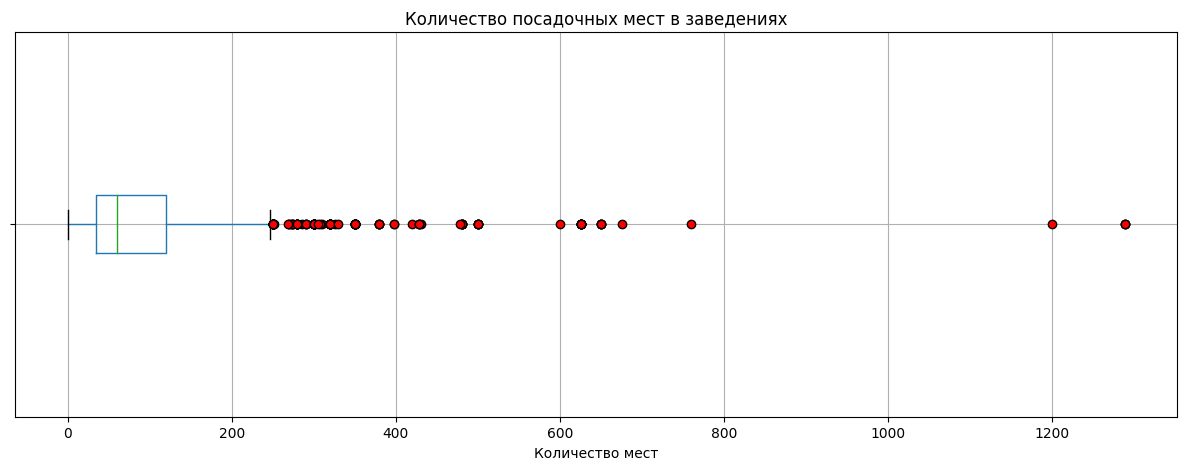

In [136]:
boxplot=df.boxplot(
    column='seats',   
    vert=False, 
    figsize=(15, 5), 
    grid=True, 
    showfliers=True,
    flierprops=dict(markerfacecolor='r', marker='o')
     )
boxplot.set_title('Количество посадочных мест в заведениях')
boxplot.set_xlabel('Количество мест')
plt.yticks(ticks=[1], labels='')

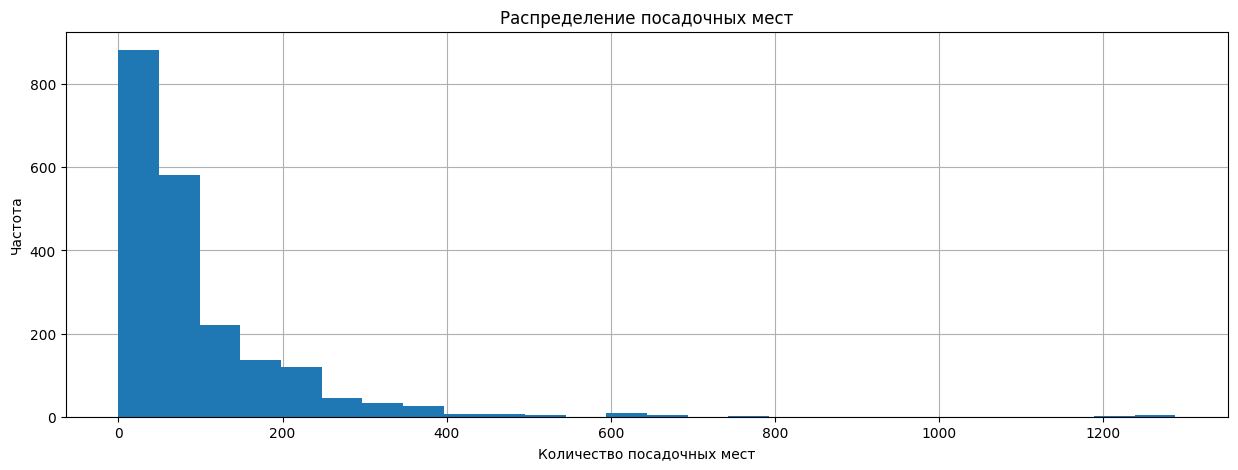

In [137]:
df['seats'].plot(
    kind='hist',
    figsize=(15,5),
    bins=26,
    grid=True,
    title='Распределение посадочных мест',
    xlabel='Количество посадочных мест',
    ylabel='Частота')
plt.gca().set_axisbelow(True)

Значения выше ~400 являются аномальными или выбросами. Минимальное значение - 0, оно будет нормальным для заведений без посадочных мест - работающих навынос или только на доставку - но будет являться аномальным для ресторанов в привычном понимании этого слова. 

Рассмотрим данные о количестве посадочных мест в разрезе категорий заведений. 

Построим диаграмму размаха посадочных мест по категориям - общего вида:

c:\Users\Lenovo\anaconda3\envs\practicum\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


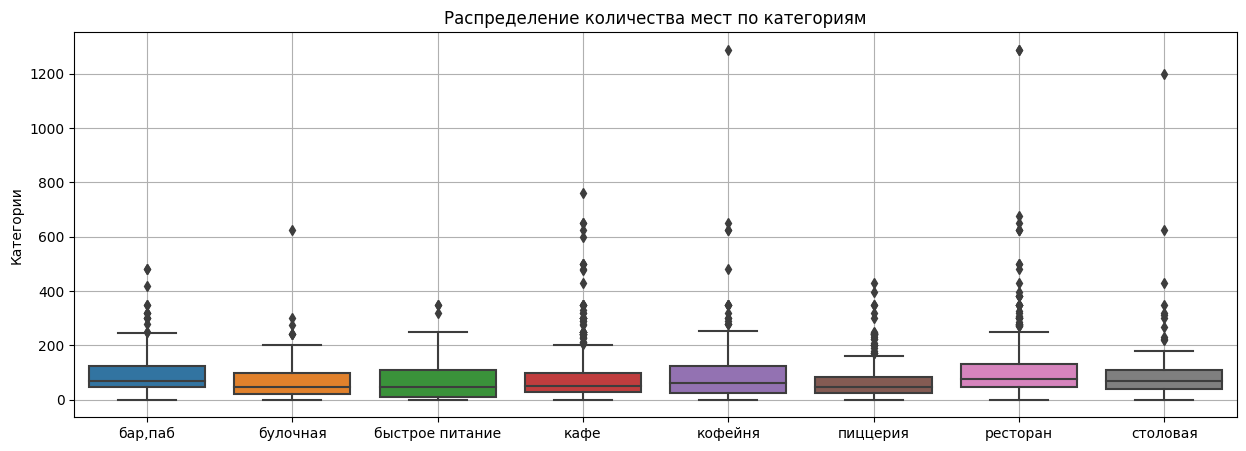

In [138]:
plt.figure(figsize=(15, 5))

sns.boxplot(x='category', y='seats', data=df)
plt.xlabel('Количество мест')
plt.ylabel('Категории')
plt.title('Распределение количества мест по категориям')
plt.grid()
plt.gca().set_axisbelow(True)
plt.xlabel('')
plt.show() 

Отключим отображение выбросов для более детальной визуализации:

c:\Users\Lenovo\anaconda3\envs\practicum\lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


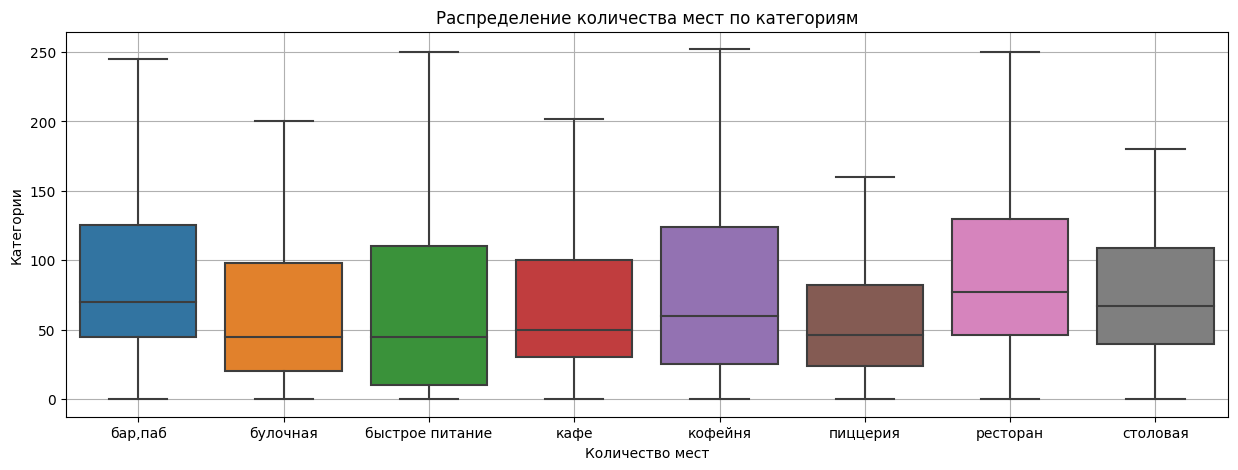

In [139]:
plt.figure(figsize=(15, 5))

sns.boxplot(x='category', y='seats',data=df,showfliers=False)
plt.xlabel('Количество мест')
plt.ylabel('Категории')
plt.title('Распределение количества мест по категориям')
plt.grid()
plt.gca().set_axisbelow(True)
plt.show() 

In [140]:
df.groupby('category')['seats'].describe()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22892\2426563763.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('category')['seats'].describe()


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",222.0,99.747749,84.780663,0.0,45.0,70.0,125.25,480.0
булочная,65.0,78.769234,99.755760,0.0,20.0,45.0,98.00,625.0
быстрое питание,96.0,73.343750,83.879745,0.0,10.0,45.0,110.00,350.0
кафе,561.0,84.228165,98.325523,0.0,30.0,50.0,100.00,760.0
кофейня,272.0,96.393379,123.856750,0.0,25.0,60.0,124.25,1288.0
пиццерия,200.0,74.650002,79.913712,0.0,24.0,46.0,82.00,428.0
ресторан,563.0,109.182945,119.760765,0.0,46.0,77.0,130.00,1288.0
столовая,102.0,103.156860,144.922958,0.0,40.0,67.0,108.50,1200.0


Для ответа на вопрос о наиболее типичном количестве посадочных мест для каждой категории заведений рассчитаем медиану:

In [141]:
df.groupby('category')['seats'].median().sort_values(ascending=False)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22892\985150487.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('category')['seats'].median().sort_values(ascending=False)


category
ресторан           77.0
бар,паб            70.0
столовая           67.0
кофейня            60.0
кафе               50.0
пиццерия           46.0
булочная           45.0
быстрое питание    45.0
Name: seats, dtype: float32

Для всех типов заведений значения выше 200-250 являются выбросами, а значение верхнего квартиля Q3 (75-го процентиля) оказывается около 80-130. Самые высокие медианные значения - у баров/пабов и ресторанов (70 и 77, соответственно). Самые низкие медианные - булочных, заведений быстрого питания и пиццерий (45-46).

### Исследование рейтинга заведений по различным категориям

Выведем основные статистические показатели по столбцу rating.

In [142]:
df['rating'].describe()

count    8402.000000
mean        4.230016
std         0.470318
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

И с детализацией по категориям заведений:

In [143]:
df.groupby('category')['rating'].describe().round(2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22892\237725031.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('category')['rating'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",764.0,4.39,0.38,1.1,4.3,4.4,4.6,5.0
булочная,256.0,4.27,0.39,1.3,4.2,4.3,4.4,5.0
быстрое питание,603.0,4.05,0.56,1.1,3.9,4.2,4.3,5.0
кафе,2376.0,4.12,0.57,1.0,4.0,4.2,4.4,5.0
кофейня,1413.0,4.28,0.37,1.4,4.1,4.3,4.4,5.0
пиццерия,633.0,4.30,0.34,1.0,4.2,4.3,4.4,5.0
ресторан,2042.0,4.29,0.41,1.0,4.2,4.3,4.5,5.0
столовая,315.0,4.21,0.45,1.0,4.1,4.3,4.4,5.0


Построим столбчатую диаграмму рейтинга по категориям:

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22892\2055129406.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(


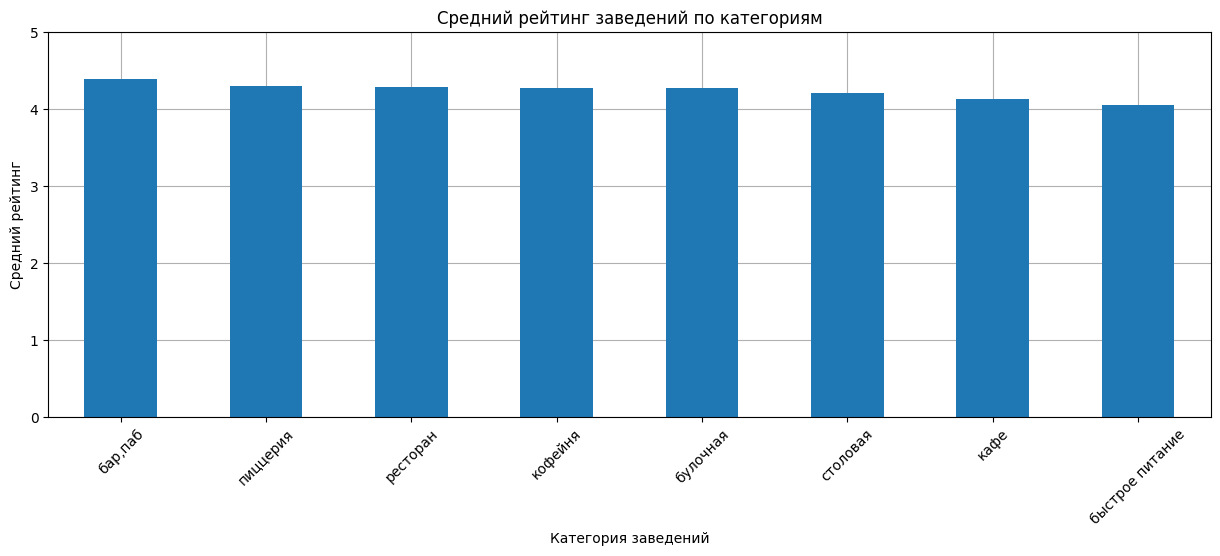

In [144]:
df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(
    kind='bar',
    rot='45',
    figsize=(15, 5),  
    title='Количество заведений различных категорий в Центральном Автономном округе',
    xlabel='Категория заведений',
    ylabel='Средний рейтинг'
)

plt.ylim(0, 5)
plt.title('Средний рейтинг заведений по категориям')
plt.grid()
plt.gca().set_axisbelow(True)
plt.show() 

Медианные значения рейтинга по всем категориям, в целом, близки, и составляют от 4,2 до 4,4. Среднее значение рейтинга баров/пабов оказывается самым высоким среди категорий - 4,39. Категорией с самым низким средним рейтингом можно назвать "быстрое питание" - 4,05.
Также можно обратить внимание на то, что для заведений быстрого питания, кафе и столовых среднее значение ниже медианного, а для остальных средние и медианы примерно одинаковы. Это может означать, что для первых трех больше доля заведений с низким рейтингом, которые будут искажать кривую распределения. 

### Изучение корреляции между рейтингом заведений и другими характеристиками

Построим корреляционную матрицу столбца `rating` с остальными.

Создадим копию датасета, чтобы заменить в столбцах price значения "нет данных" (которые будут искажать картину корреляции) на пропуски.

In [145]:
cor_df=df.copy()
cor_df['price']=cor_df['price'].replace('нет данных', np.nan)
cor_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22892\1795274464.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cor_df['price']=cor_df['price'].replace('нет данных', np.nan)


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WOWФЛИ,кафе,"МОСКВА, УЛИЦА ДЫБЕНКО, 7/1",САО,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,нет данных,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,ЧЕТЫРЕ КОМНАТЫ,ресторан,"МОСКВА, УЛИЦА ДЫБЕНКО, 36, КОРП. 1",САО,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,ХАЗРИ,кафе,"МОСКВА, КЛЯЗЬМИНСКАЯ УЛИЦА, 15",САО,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,DORMOUSE COFFEE SHOP,кофейня,"МОСКВА, УЛИЦА МАРШАЛА ФЕДОРЕНКО, 12",САО,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,ИЛЬ МАРКО,пиццерия,"МОСКВА, ПРАВОБЕРЕЖНАЯ УЛИЦА, 1Б",САО,"ежедневно, 10:00–22:00",5.0,1,NaN,средние,Средний счёт:400–600 ₽,500.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,СУШИ МАНИЯ,кафе,"МОСКВА, ПРОФСОЮЗНАЯ УЛИЦА, 56",ЮЗАО,"ежедневно, 09:00–02:00",4.4,0,NaN,NaN,нет данных,NaN,NaN,False
8402,ee6bb7c3650e47bd8186fca08eda1091,МИСЛАВНЕС,кафе,"МОСКВА, ПРОЛЕТАРСКИЙ ПРОСПЕКТ, 19, КОРП. 1",ЮАО,"ежедневно, 08:00–22:00",4.8,0,NaN,NaN,нет данных,NaN,NaN,False
8403,62e8c64d4c89467aba608e39ef87616b,САМОВАР,кафе,"МОСКВА, ЛЮБЛИНСКАЯ УЛИЦА, 112А, СТР. 1",ЮВАО,"ежедневно, круглосуточно",3.9,0,NaN,NaN,Средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,ЧАЙХАНА SABR,кафе,"МОСКВА, ЛЮБЛИНСКАЯ УЛИЦА, 112А, СТР. 1",ЮВАО,"ежедневно, круглосуточно",4.2,1,NaN,NaN,нет данных,NaN,NaN,True


interval columns not set, guessing: ['chain', 'seats', 'rating']


Text(-4.418402777777782, 0.5, 'Характеристики')

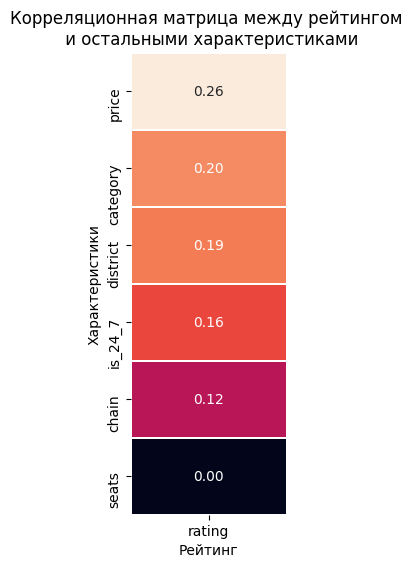

In [146]:
correlation_matrix = cor_df[['category', 'district', 'chain', 'seats', 'price','is_24_7','rating']].phik_matrix()
correlation_matrix=correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
plt.figure(figsize=(2, 6))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f', 
            linewidths=0.5,
            cbar=False
           )
plt.title('Корреляционная матрица между рейтингом \n и остальными характеристиками')
plt.xlabel('Рейтинг')
plt.ylabel('Характеристики')


Самый высокий коэффициент корреляции - между рейтингом и ценой - 0.28. Построим столбчатую диаграмму для этих столбцов.

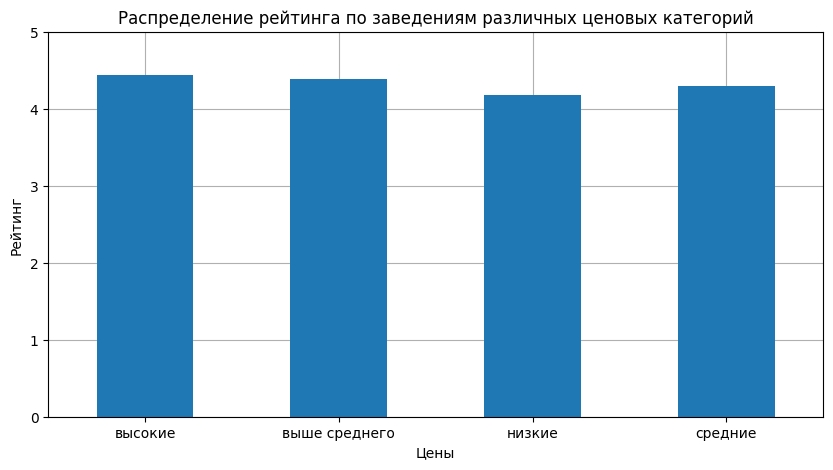

In [147]:
grouped = df[df['price']!='нет данных'].groupby('price', observed=True)['rating'].mean()
grouped.plot(kind='bar',
               title=f'Распределение рейтинга по заведениям различных ценовых категорий',
               ylabel='Рейтинг',
               xlabel='Цены',
               rot=0,
               figsize=(10, 5))
plt.grid()
plt.ylim(0, 5)
plt.gca().set_axisbelow(True)

Выведем расчетные значения среднего рейтинга в заведениях разных ценовых категорий.

In [148]:
result = df[df['price']!='нет данных'].groupby('price', as_index=True,observed=True)['rating'].mean()
print(result.round(2))

price
высокие          4.44
выше среднего    4.39
низкие           4.17
средние          4.30
Name: rating, dtype: float32


По графику и полученной таблице можем наблюдать, как при повышении ценовой категории заведения растёт её средний рейтинг от 4,17 для "низких" до 4,44 - для "высоких". В более дорогих заведениях, как правило, более высокий уровень клиентского сервиса и качество/ассортимент/оригинальность ингредиентов и блюд, а это напрямую влияет на удовлетворенность посетителей, которая выражается в уровне рейтинга. 

### Топ-15 популярных сетей в Москве


Рассчитаем количество заведений в сетях общественного питания и выделим топ-15, выведем категорию заведений и средний рейтинг.

Выборочно выведем категории сетевых заведений.

In [179]:
for name_tmp in ['МУ-МУ','БУХАНКА','ШОКОЛАДНИЦА','ТЕРЕМОК']:
    print(f'Заведения с одинаковым именем {name_tmp} относятся к категориям:\n\
{", ".join(df[df["name"] == name_tmp]["category"].unique())}\n')

Заведения с одинаковым именем МУ-МУ относятся к категориям:
кафе, ресторан, кофейня, быстрое питание, пиццерия, столовая, бар,паб

Заведения с одинаковым именем БУХАНКА относятся к категориям:
булочная, кофейня, кафе

Заведения с одинаковым именем ШОКОЛАДНИЦА относятся к категориям:
кофейня, кафе

Заведения с одинаковым именем ТЕРЕМОК относятся к категориям:
ресторан, быстрое питание



В качестве категории сетевых заведений укажем самое часто встречающееся значение для заведений сети.

In [168]:
grouped_df=df.groupby('name', observed=True).agg({
    'chain':'sum',
    'rating':'mean'
    }).sort_values(by='chain',ascending=False).head(15).reset_index()
top_category = df.groupby('name', observed=True)['category'].agg(pd.Series.mode)

grouped_df['category'] = grouped_df['name'].map(top_category)
grouped_df['rating']=round(grouped_df['rating'],2)
grouped_df

,name,chain,rating,category
0,ШОКОЛАДНИЦА,120,4.18,кофейня
1,ДОМИНО'С ПИЦЦА,76,4.17,пиццерия
2,ДОДО ПИЦЦА,74,4.29,пиццерия
3,ONE PRICE COFFEE,71,4.07,кофейня
4,ЯНДЕКС ЛАВКА,69,3.87,ресторан
5,COFIX,65,4.08,кофейня
6,PRIME,50,4.12,ресторан
7,ХИНКАЛЬНАЯ,44,4.32,кафе
8,КОФЕПОРТ,42,4.15,кофейня
9,КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ,39,4.39,кафе


В рамках данного графика переименуем название `КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ` в `КАРАВАЕВЫ`.

In [153]:
grouped_df=grouped_df.replace('КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ','КАРАВАЕВЫ')

Text(0.5, 0, 'Название')

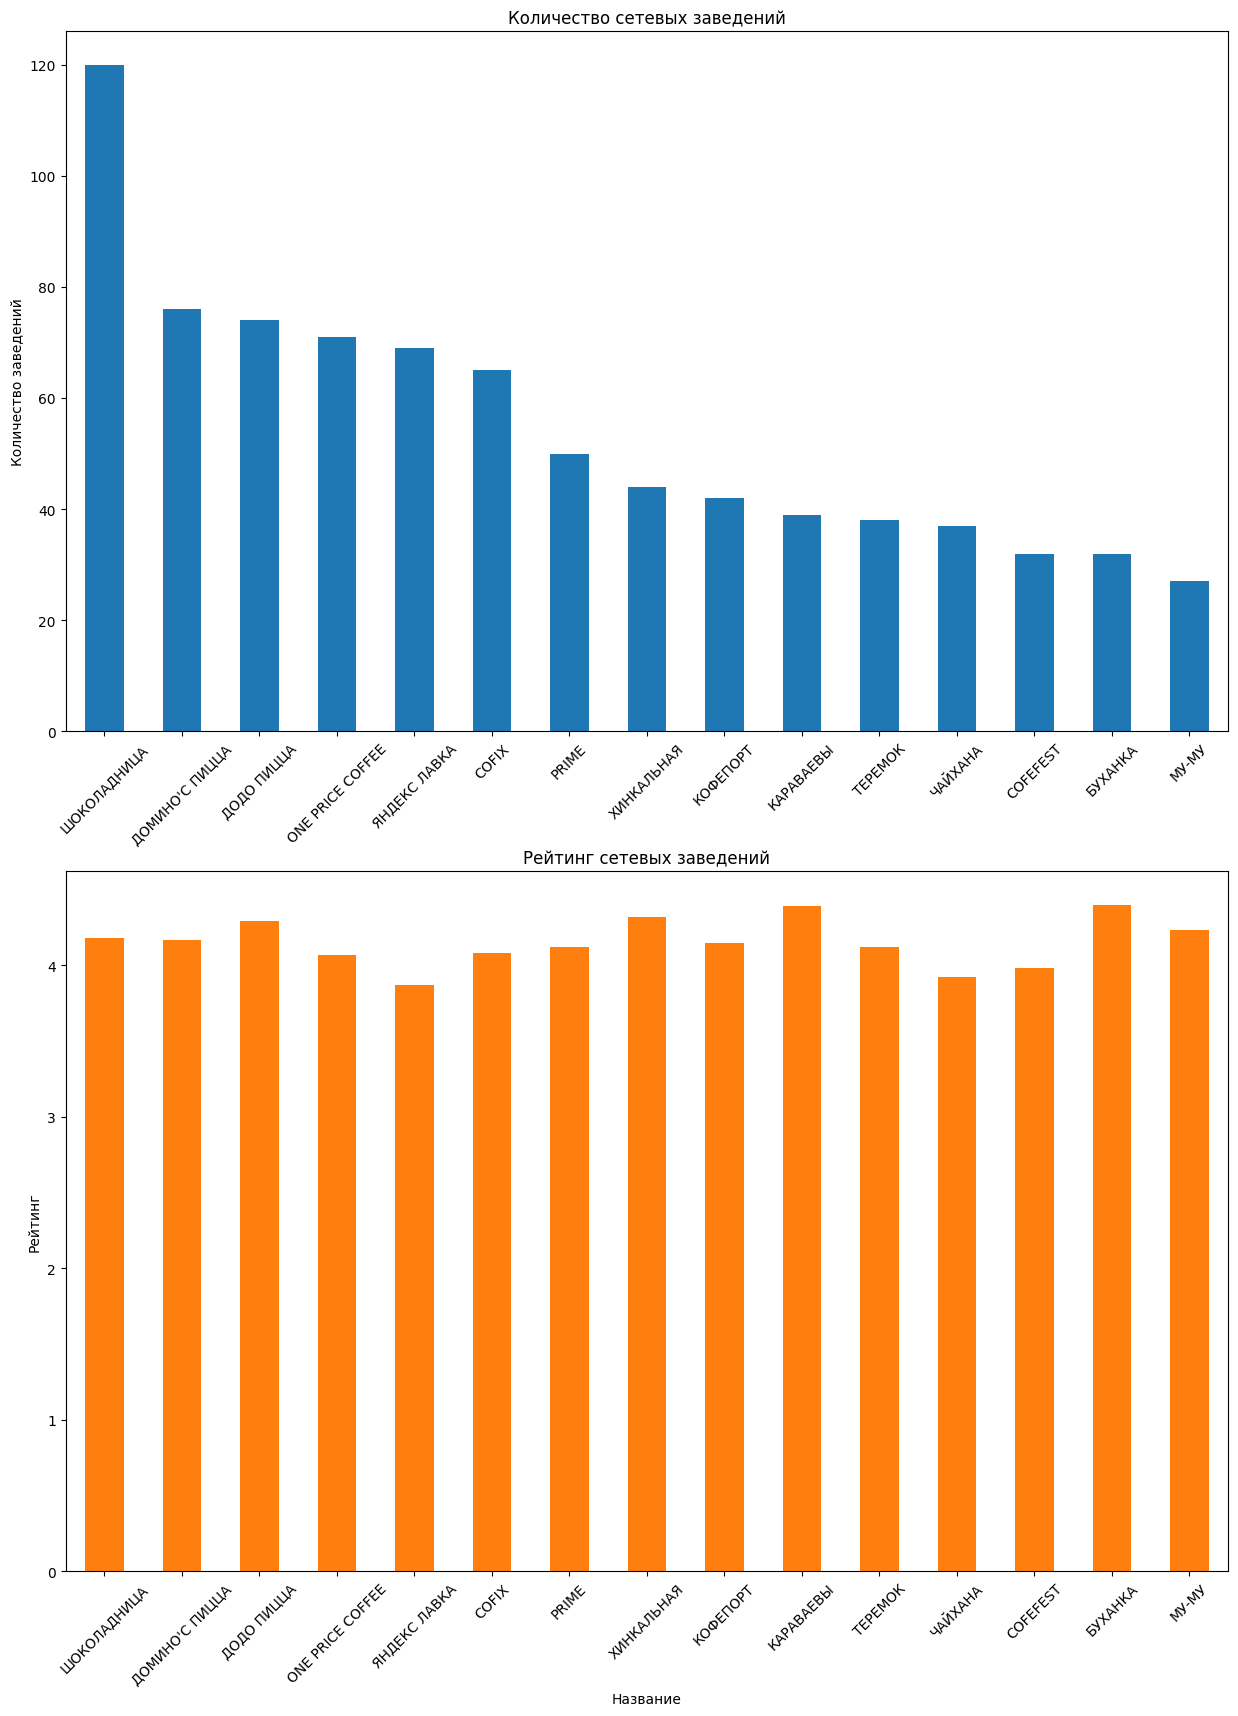

In [154]:
axes=grouped_df.plot(
    kind='bar',
    subplots=True,
    sharex=False,
    figsize=(15,20),
    x='name',
    rot=45,
    legend=False,
    title=['Количество сетевых заведений', 'Рейтинг сетевых заведений']
)
axes[0].set_ylabel('Количество заведений')
axes[0].set_xlabel('')
axes[1].set_ylabel('Рейтинг')
plt.xlabel('Название')

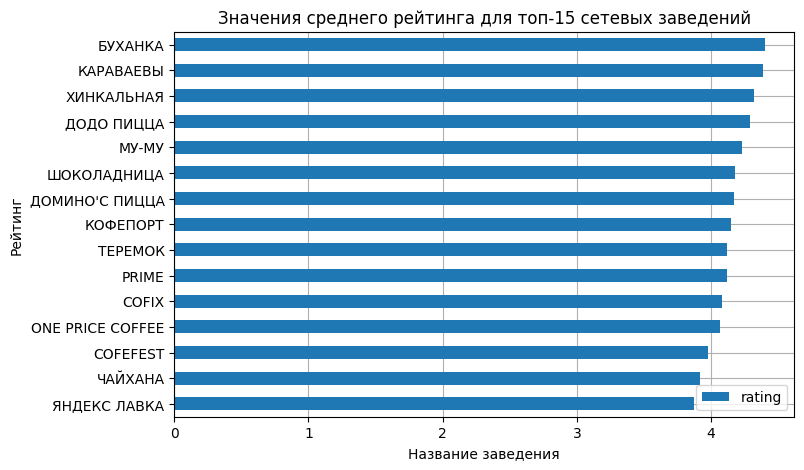

In [155]:
grouped_df.sort_values(by='rating').plot(
    kind='barh',
    x='name',
    y='rating',
    figsize=(8,5),
    grid=True,
    xlabel="Название заведения",
    ylabel='Рейтинг',
    title='Значения среднего рейтинга для топ-15 сетевых заведений')
plt.gca().set_axisbelow(True)
plt.show()

Лидером по количеству заведений является Шоколадница - в этой сети 120 заведений на территории города Москвы. В полученном топ-е присутствуют, одним словом, заведения быстрого питания - кафе, кофейни, пиццерии (в полученном списке заведения, отнесенные к категории ресторанов, таковыми не являются в привычном понимании этого слова).

Среди топ-15 сетевых заведений самый высокий рейтинг - у "Буханки" - 4.40, самый низкий - у "Яндекс Лавки" - 3.87. 

### Зависимость среднего чека заведения от округа Москвы

Выведем основные статистические показатели среднего чека по округам Москвы:

In [156]:
df.groupby('district')['middle_avg_bill'].describe()

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
ВАО,260.0,820.626953,850.903503,50.0,338.00,575.0,1100.0,10000.0
ЗАО,306.0,1053.225464,779.008423,50.0,427.50,1000.0,1500.0,5250.0
САО,322.0,927.959656,912.608765,130.0,350.00,650.0,1250.0,11000.0
СВАО,301.0,716.611267,591.232117,50.0,325.00,500.0,950.0,4500.0
СЗАО,157.0,822.222900,595.055176,120.0,340.00,700.0,1100.0,2900.0
ЦАО,1059.0,1192.182251,919.718994,67.0,500.00,1000.0,1500.0,7250.0
ЮАО,314.0,834.398071,2008.639160,100.0,350.00,500.0,1037.5,35000.0
ЮВАО,194.0,654.097961,566.825684,30.0,281.25,450.0,887.5,3750.0
ЮЗАО,235.0,792.561707,559.173035,100.0,350.00,600.0,1100.0,2750.0


И в среднем по Москве:

In [157]:
df['middle_avg_bill'].describe()

count     3148.000000
mean       958.358032
std       1009.748169
min         30.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

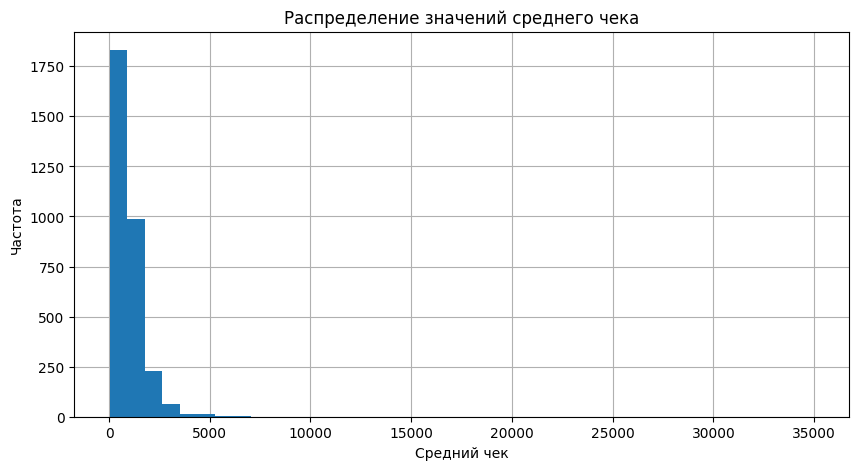

In [158]:
df['middle_avg_bill'].plot(
    kind='hist',
    figsize=(10,5),
    bins=40, 
    xlabel='Средний чек',
    ylabel='Частота',
    title='Распределение значений среднего чека', 
    grid=True    )
plt.gca().set_axisbelow(True)
plt.show()

([<matplotlib.axis.YTick at 0x290d4f17a30>], [Text(0, 1, '')])

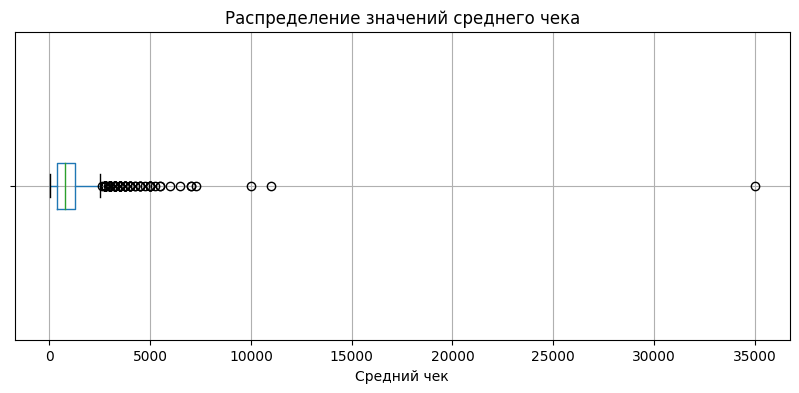

In [159]:
df.boxplot(
    column='middle_avg_bill',
    vert=False,
    figsize=(10,4))
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')
plt.yticks(ticks=[1], labels='')

Отключим отображение выбросов для более детальной визуализации

([<matplotlib.axis.YTick at 0x290d4ec3bb0>], [Text(0, 1, '')])

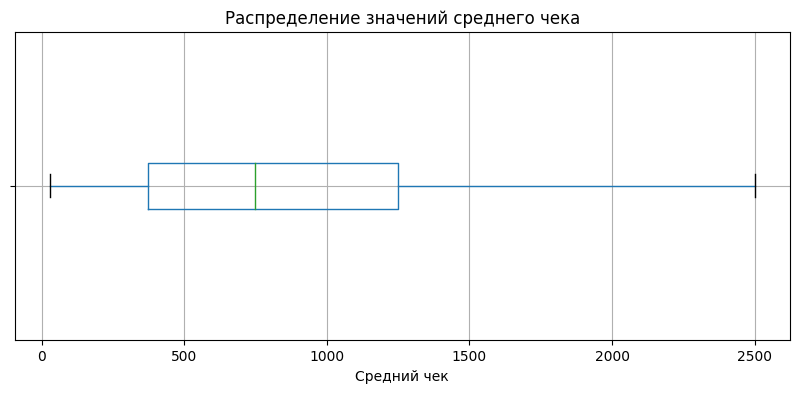

In [160]:
df.boxplot(
    column='middle_avg_bill',
    vert=False,
    figsize=(10,4),
    showfliers=False)
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')
plt.yticks(ticks=[1], labels='')


Из построенных графиков видно, что значения среднего чека выше 2500 рублей являются выбросами. Кривая распределения смещена влево (в область низких значений), медиана по Москве - 750, а среднее 958. 

Построим диаграмму распределения среднего чека заведений общественного питания по округам Москвы. 

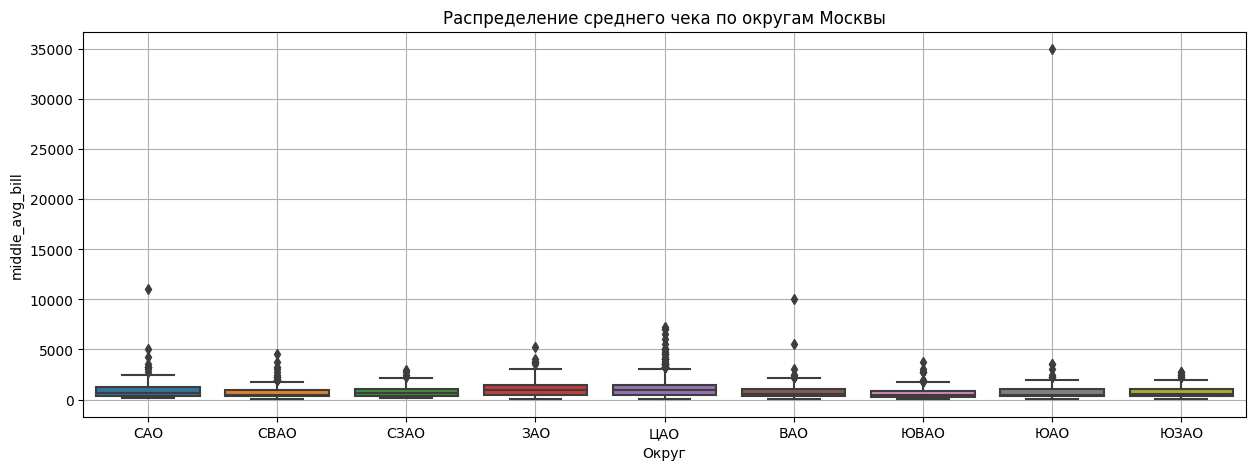

In [161]:
plt.figure(figsize=(15, 5))

sns.boxplot(x='district', y='middle_avg_bill', data=df)
plt.xlabel('Округ')
plt.title('Распределение среднего чека по округам Москвы')
plt.grid()
plt.gca().set_axisbelow(True)
plt.show() 

Отключим отображение выбросов для более детальной визуализации:

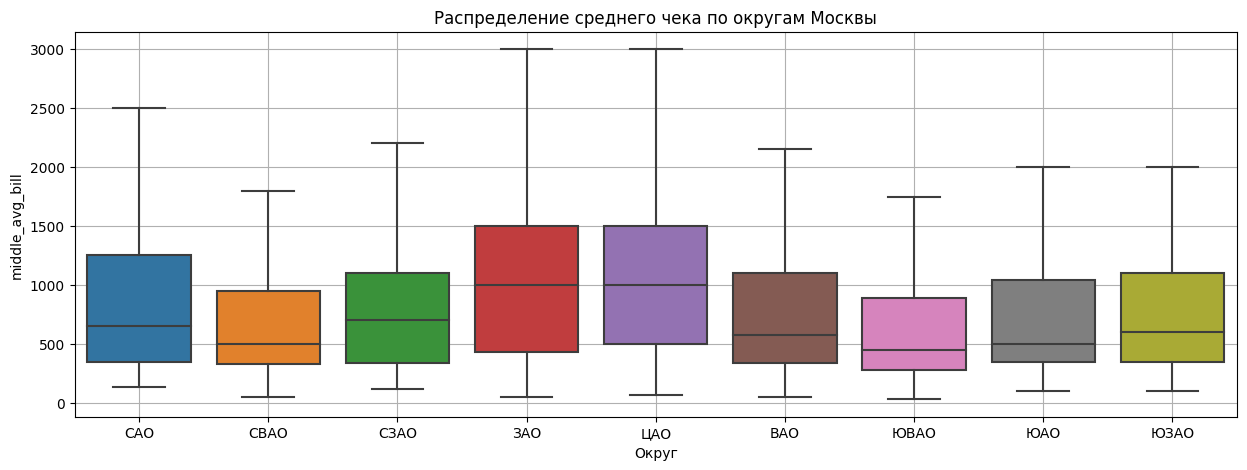

In [162]:
plt.figure(figsize=(15, 5))

sns.boxplot(x='district', y='middle_avg_bill', data=df,showfliers=False)
plt.xlabel('Округ')
plt.title('Распределение среднего чека по округам Москвы')
plt.grid()
plt.gca().set_axisbelow(True)
plt.show() 

Рассчитаем средние и медианные значения чека по округам.

In [163]:
result = df.groupby('district', as_index=True,observed=True).agg(
    среднее=('middle_avg_bill', 'mean'),
    медиана=('middle_avg_bill', 'median')
).sort_values(by='среднее',ascending=False)
print(round(result))

          среднее  медиана
district                  
ЦАО        1192.0   1000.0
ЗАО        1053.0   1000.0
САО         928.0    650.0
ЮАО         834.0    500.0
СЗАО        822.0    700.0
ВАО         821.0    575.0
ЮЗАО        793.0    600.0
СВАО        717.0    500.0
ЮВАО        654.0    450.0


Визуализируем значения среднего и медианы по округам.

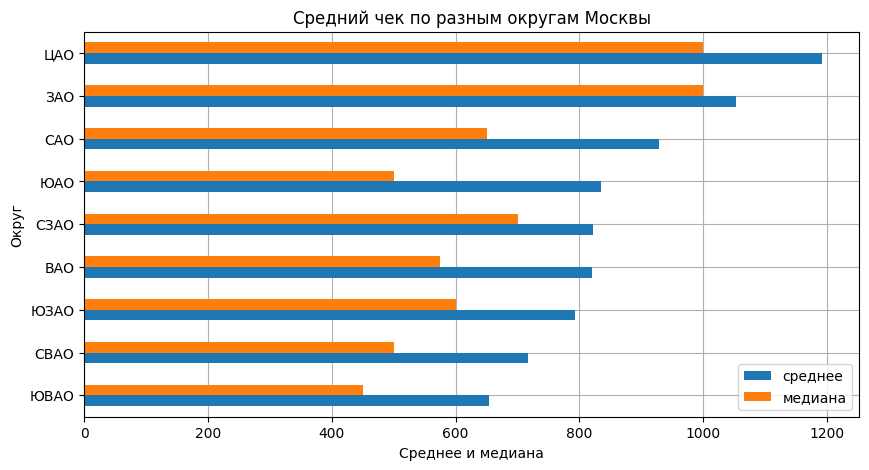

In [164]:
result.sort_values(by='среднее').plot(
    kind='barh',
    grid=True,
    title='Средний чек по разным округам Москвы',
    figsize=(10,5)
)
plt.ylabel('Округ')
plt.xlabel('Среднее и медиана')
plt.gca().set_axisbelow(True)

В ЦАО и ЗАО распределение цен приблизительно одинаковое и, в среднем, выше, чем в других округах Москвы. Разброс данных в них так же больше, чем в других округах. В САО цены немного ниже, чем в ЦАО и ЗАО, но выше, чем в остальных округах, разброс значений также достаточно большой.

Самое высокое медианное значение (1000) - в ЦАО и ЗАО, что ожидаемо, поскольку эти округа считаются самыми дорогими, престижными в Москве. Для ЦАО при этом среднее составляет 1192, что говорит о наличии выбросов в области высоких значений (также - ожидаемо). 
В ЗАО разница между медианой (1000) и средним (1053) небольшая (и самая низкая по Москве) указывает на почти симметричное распределение без значительных выбросов. В населении округа преобладает стабильный средний класс, с однородной платежеспособностью.

Самые низкие медианные значения и большая разница между средним и медианой наблюдаются для ЮВАО и ЮАО. Это говорит о большой доле недорогих заведений, сильной асимметрии распределения по среднему чеку. 

### **Промежуточные выводы:**

1) Заведения разделены на 8 типов, 70% всех заведений Москвы относятся к кафе, ресторанам или кофейням.

2) Количество заведений в ЦАО существенно выше, чем в остальных округах Москвы и составляет около 27% от общего числа. В ЦАО соотношение разных типов заведений отличается от среднего по Москве. Так, существенно выше доля ресторанов и баров/пабов, немного выше доля кофеен.

3) Среди данных 5200 заведений являются несетевыми и 3203 - сетевыми. Сетевыми чаще являются булочные, кофейни и пиццерии. Реже всего сетевыми являются бары и столовые.

4) В датасете присутствуют некорректные данные о посадочных местах - для заведений, имеющих одинаковый адрес, указано одно и то же значение, часто - завышенное. Данные очищены от значений количества мест, относящихся к одному адресу, поскольку они могут искажать картину. 

Количество посадочных мест имеет широкий разброс для всех категорий, медианные значения выше для баров/пабов и ресторанов, ниже - для булочных, быстрого питания и пиццерий. Рассчитаны наиболее типичные количества мест для различных категорий заведений. Самые высокие медианные значения - у баров/пабов и ресторанов (70 и 77, соответственно). Самые низкие медианные - булочных, заведений быстрого питания и пиццерий (45-46)

5) Размах значений рейтингов заведений для всех типов большой, медианные значения, в целом, близки - от 4.2 до 4.4. Среднее значение рейтинга баров/пабов оказывается самым высоким среди категорий - 4,39. Категорией с самым низким средним рейтингом можно назвать "быстрое питание" - 4,05. Для заведений быстрого питания, кафе и столовых среднее значение ниже медианного, а для остальных средние и медианы примерно одинаковы. Это может означать, что для первых трех больше доля заведений с низким рейтингом, которые будут искажать кривую распределения, а для остальных распределение близко к симметричному.

6) Исследована корреляция между рейтингом и другими характеристиками заведения. Подробнее рассмотрена зависимость между рейтингом и ценовой категорией. Наблюдается рейтинга при повышении ценовой категории. 

7) Выделен топ-15 популярных сетей общественного питания Москвы - в него вошли, в основном, кофейни, пиццерии, кафе. Рассчитан средний рейтинг сетевых заведений топ-а - самый высокий - у «Буханки», самый низкий - у «Яндекс Лавки»

8) Изучена зависимость среднего чека от округа Москвы. Ожидаемо, в ЦАО и ЗАО средний чек выше, чем в остальных округах. В ЗАО распределение близко к симметричному - в населении округа преобладает стабильный средний класс, с однородной платежеспособностью. Самые низкие медианные значения и большая разница между средним и медианой наблюдаются для ЮВАО, СВАО и ЮАО. Это говорит о большой доле недорогих заведений, сильной асимметрии распределения по среднему чеку. 


## Результаты, выводы и рекомендации

Общий вывод проекта должен содержать следующие основные моменты:

Целью настоящего проекта было провести исследование рынка общественного питания Москвы для определения оптимальных параметров открытия нового заведения с целью максимизации его потенциальной успешности и прибыльности. 

В ходе знакомства с данными и их предварительной обработки были объединены 2 таблицы - с информацией о заведениях и о их ценовых характеристиках. 

Исправлены типы данных, где это требовалось, а также сделаны предположения о природе возниковения пропусков (в столбцах middle_avg_bill и middle_coffee_cup пропуски зависят от столбца avg_bill, а в остальных являются случайными). 

Обработаны пропущенные значения - в столбцах с часами работы и ценовой категорией заменены на "нет данных", в других столбцах пропуски были оставлены. 

Был проведен анализ данных на явные и неявные дубликаты - для этого были нормализованы данные в столбцах name, address - было удалено 4 дубликата. 

Всего на этапе обработки было удалено 4 строки, или  0,05%. 

Подготовлены ответы на вопросы заказчика:
1) Заведения представлены 8 типами

2) Доля заведений в ЦАО составляет 27% от всех - самая высокая доля округа в Москве. В ЦАО выше доля баров/пабов и кофеен, чем в среднем по Москве

3) Среди данных 5200 заведений являются несетевыми и 3203 - сетевыми. Сетевыми чаще являются булочные, кофейни и пиццерии.

4) Обнаружены некорректные значения в данных о количестве посадочных мест. Для заведений, расположенных по одному адресу, количества совпадают - эти данные очищены (заменены пропусками). По очищенным данным, самые высокие медианные значения количества мест - у баров/пабов и ресторанов (70 и 77, соответственно). Самые низкие медианные - булочных, заведений быстрого питания и пиццерий (45-46). 

5) Медианные рейтинги заведений разных типов близки - от 4,2 до 4,4, а средние самые высокие у баров/пабов 4,39, самые низкие - у заведений быстрого питания - 4,05. Для заведений категорий, кроме быстрого питания, кафе и столовых, распределение близкое к симметричному. 

6) Наблюдается положительная корреляция ценовой категории заведения и его рейтинга. 

7) Выделен топ-15 сетевых заведений общественного питания, в него вошли, в основном, кофейни, пиццерии, кафе. Рассчитан средний рейтинг сетевых заведений топ-а - самый высокий - у «Буханки», самый низкий - у «Яндекс Лавки»

8) Изучена зависимость среднего чека от округа Москвы. Ожидаемо, в ЦАО и ЗАО средний чек выше, чем в остальных округах, кроме того, в ЗАО самая симметричная кривая распределения среднего чека.

Инвесторам из фонда, желающим открыть заведение общественного питания в Москве, может быть рекомендовано придерживаться следующих критериев при выборе подходящего места:
- ЦАО, ЗАО - основываясь на данных, там выше рейтинг заведений, а также средний чек.
- Категория заведений - бар/паб, пиццерия или ресторан.
- Количество посадочных мест - 46-77 (в зависимости от типа заведения)
- Стоит также рассмотреть возможность открытия заведения по франшизе в сети с зарекомендовавшим себя именем (с высоким средним рейтингом) - например, Буханка. 
- Рекомендуется дополнительно изучить распределение среднего чека по категориям заведений и его взаимосвязи с рейтингом для определения оптимального среднего чека будущего заведения. 